In [1]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine
# from scraping some data
import webbrowser
import wikipedia

import warnings
warnings.filterwarnings('ignore')

In [2]:
# helper functions

def fig_this_size(x,y):
    """
    Input the length and width of the canvas.
    """
    return plt.figure(figsize=(x,y))

In [247]:
# importing in the dataset:
cols = 'age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal num'.split()
df = pd.read_csv('heartdisease_data.csv',header=None)

In [248]:
# impute the column names in the dataset
df.columns = cols

### Goal : 
TO find out, if the heart diease or not 
ie, the num values from (1,2,3,4) predict 'Disease Present'
         and 0 predicts 'No Disease Predict

In [407]:
df['Disease'] = df['num'].where(df.num ==0,1)

In [408]:
# head of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Disease
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2,1
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2,1
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0,0


In [409]:
# tails of the dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Disease
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2,1
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0,0
199,62,1,2,120.0,254.0,0.0,2,93.0,1.0,0.0,NaN,NaN,NaN,1,1


In [410]:
# shape of the dataset
df.shape

(200, 15)

* There are 200 samples in the dataset.
* There are 13 Features in the dataset.
* The target variable num is a category between 0 to 4.
* This is a classification problem.

In [411]:
# get info on the dtpyes of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  144 non-null    float64
 4   chol      193 non-null    float64
 5   fbs       193 non-null    float64
 6   restecg   200 non-null    int64  
 7   thalach   147 non-null    float64
 8   exang     147 non-null    float64
 9   oldpeak   144 non-null    float64
 10  slope     98 non-null     float64
 11  ca        2 non-null      float64
 12  thal      34 non-null     float64
 13  num       200 non-null    int64  
 14  Disease   200 non-null    int64  
dtypes: float64(9), int64(6)
memory usage: 23.6 KB


* In the dataset,we have round 50 percent numerical features and categorical features.

In [412]:
# description on the dataset.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Disease
count,200.000000,200.000000,200.000000,144.000000,193.000000,193.000000,200.000000,147.000000,147.000000,144.000000,98.000000,2.0,34.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.352332,0.735000,122.795918,0.646259,1.320833,2.132653,0.0,6.294118,1.520000,0.745000
std,7.811697,0.171015,0.795701,21.537733,114.035232,0.478939,0.683455,21.990328,0.479765,1.106236,0.667937,0.0,1.291685,1.219441,0.436955
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.0,3.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,0.000000,0.000000,0.000000,109.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,130.000000,216.000000,0.000000,1.000000,120.000000,1.000000,1.500000,2.000000,0.0,7.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,147.000000,258.000000,1.000000,1.000000,140.000000,1.000000,2.000000,3.000000,0.0,7.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,0.0,7.000000,4.000000,1.000000


* There are no outliers to be send by just eyeballing the description.

In [413]:
# A dataframe that describes the features
heart_disease_info = pd.read_csv('HD_datase_info.csv',index_col='Feature')

In [414]:
heart_disease_info

,Description,Domain,Data type,Mean,Standard deviation
Feature,,,,,
Age,—,29–77,Real,54,9
Sex,"Male, female","0, 1",Binary,—,—
Chest pain type,"Angina, asymptomatic, abnormal","1, 2, 3, 4",Nominal,—,—
Resting blood pressure,—,94–200,Real,131.344,17.862
Serum cholesterol in mg/dl,—,126–564,Real,249.659,51.686
Fasting blood sugar > 120 mg/dl,—,"0, 1",Binary,—,—
Resting electrocardiographic results,"Norm, abnormal, hyper","0, 1, 2",Nominal,—,—
Maximum heart rate achieved,—,71–202,Real,149.678,23.1666
Exercise-induced angina,—,"0, 1",Binary,—,—


In [415]:
heart_disease_info.to_csv('HD_datase_info.csv')

In [416]:
# check for missing values in the dataset
df.isna().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
Disease       0
dtype: int64

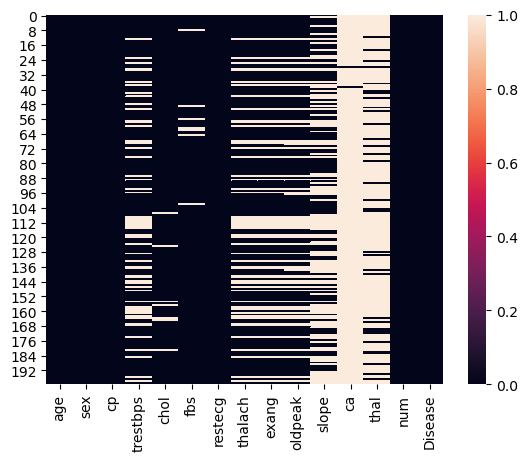

In [417]:
sns.heatmap(df.isna())

* Even though, we can see the clean slate here, we can see some `?` in some of the feautres.
* Those are the missing values in the dataset

In [418]:
# let's find and replace the ? with np.nan
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Disease
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2,1
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2,1
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2,1
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [419]:
for col in df.columns:
    
    df.loc[:,col] = df.loc[:,col].mask(df.loc[:,col] == '?',np.nan)

In [420]:
# We can see that all the features are in inter form, let's convert the dtype of every feature to int type.
for col in df.columns:
    if df[col].dtype != 'int64':
        
        df[col] = df[col].astype('float64')

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  144 non-null    float64
 4   chol      193 non-null    float64
 5   fbs       193 non-null    float64
 6   restecg   200 non-null    int64  
 7   thalach   147 non-null    float64
 8   exang     147 non-null    float64
 9   oldpeak   144 non-null    float64
 10  slope     98 non-null     float64
 11  ca        2 non-null      float64
 12  thal      34 non-null     float64
 13  num       200 non-null    int64  
 14  Disease   200 non-null    int64  
dtypes: float64(9), int64(6)
memory usage: 23.6 KB


In [422]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Disease
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2,1
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2,1
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0,0


In [423]:
# now.let's again check for the null values in the dataset

# total number of missing values per fetaure in the dataset
df.isna().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
Disease       0
dtype: int64

In [424]:
# total mising percentage per feature in the dataset
df.isna().mean()*100

age          0.0
sex          0.0
cp           0.0
trestbps    28.0
chol         3.5
fbs          3.5
restecg      0.0
thalach     26.5
exang       26.5
oldpeak     28.0
slope       51.0
ca          99.0
thal        83.0
num          0.0
Disease      0.0
dtype: float64

* Inference:
    * the ca and thal features have more than 90percent of the missing values.
    * We drop such columns as imputing such a large percentage of values can give us missleading results.
    * Some features have more than 25 perent of missing data, we may either impute them or drop those subset of samples in which the data is missing.

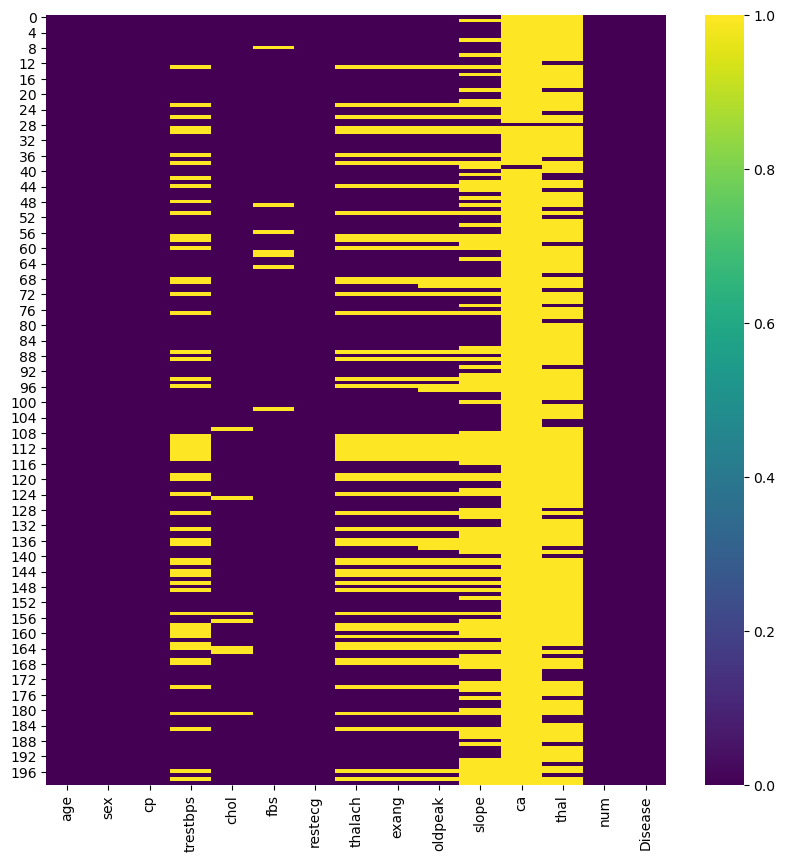

In [425]:
# heatmap of the missing values in the dataset.
fig_this_size(10,10)
sns.heatmap(df.isna(),cmap='viridis')

In [426]:
# Univariate Analysis:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Disease
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2,1
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2,1
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2,1
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [427]:
## Age:
df.age.describe()

count    200.000000
mean      59.350000
std        7.811697
min       35.000000
25%       55.000000
50%       60.000000
75%       64.000000
max       77.000000
Name: age, dtype: float64

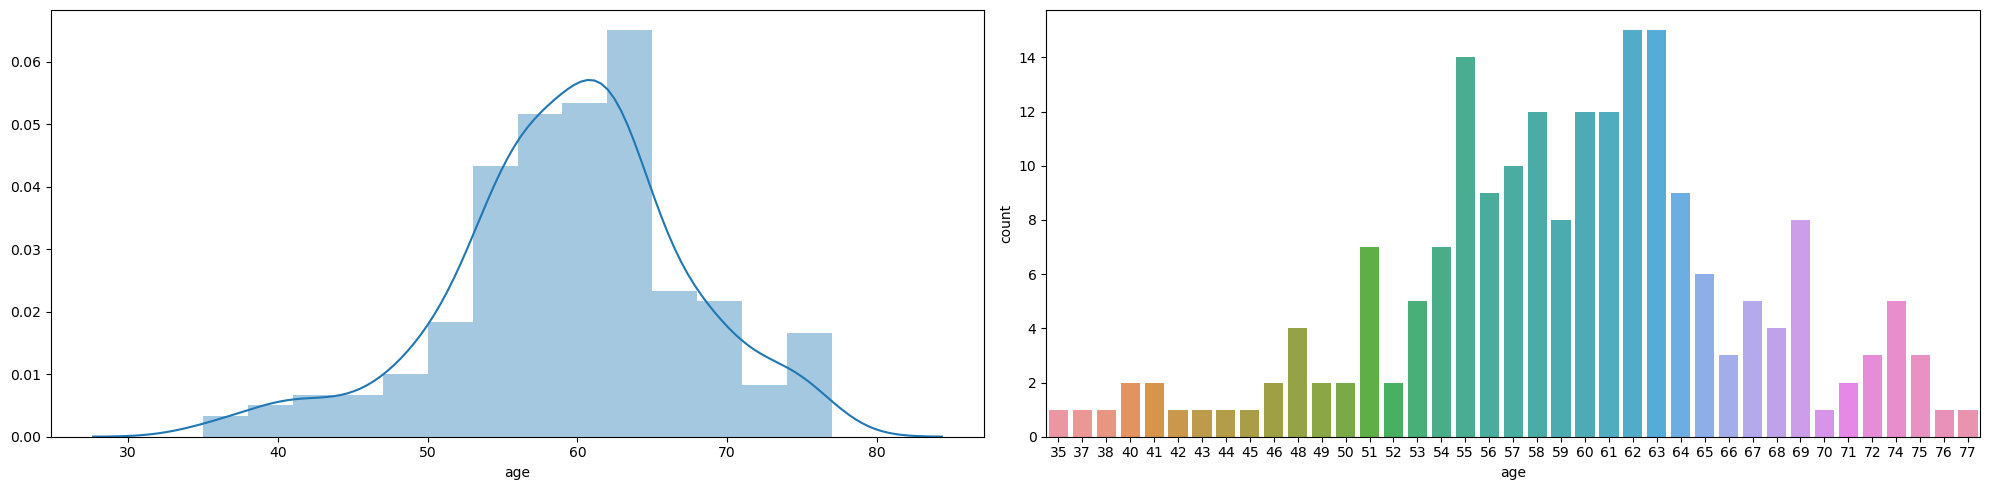

In [428]:
# plotting the distribution and the histogram of `Age`.

fig = fig_this_size(20,5)

fig.add_subplot(121)
sns.distplot(df.age)

fig.add_subplot(122)
sns.countplot(df.age)
plt.tight_layout()

In [429]:
## Sex
df.sex.value_counts()

1    194
0      6
Name: sex, dtype: int64

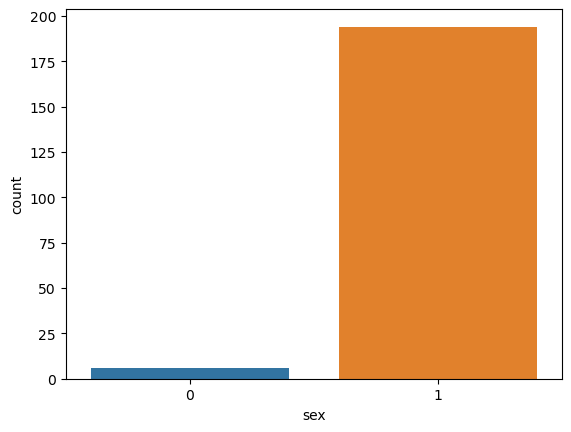

In [430]:
sns.countplot(df.sex)

* Sex is  a pretty imbalanced feature. Most of the paitients are mall(considering 1:Male as per general convention)

In [431]:
# CP 

In [432]:
df.cp.value_counts()

4    131
3     47
2     14
1      8
Name: cp, dtype: int64

* There are 4 type of values assigned for different categories of <b>Chest Pain</b>.
    *  cp: chest pain type
        * Value 1: typical angina
        * Value 2: atypical angina
        * Value 3: non-anginal pain
        * Value 4: asymptomatic

In [433]:
cp_types = {1:'typical angina',2:'atypical angina',3:'non-anginal pain',4:'asymptomatic'}

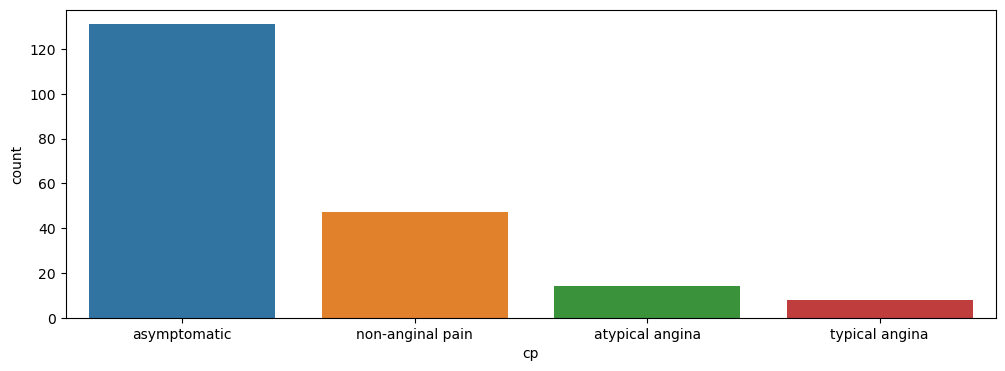

In [434]:
fig_this_size(12,4)
sns.countplot(df.cp.map(cp_types),order=df.cp.map(cp_types).value_counts().index)

* Most of the patients suffer from asymptomatic chest pain
* The angina type chest pain is rarely seen in the patients with heatdisease

In [435]:
# cholestrol
df.chol.describe()

count    193.000000
mean     178.746114
std      114.035232
min        0.000000
25%        0.000000
50%      216.000000
75%      258.000000
max      458.000000
Name: chol, dtype: float64

In [436]:
df[df.chol == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Disease
5,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0,NaN,NaN,0,0
7,60,1,3,180.0,0.0,0.0,1,140.0,1.0,1.5,2.0,NaN,NaN,0,0
8,60,1,3,120.0,0.0,NaN,0,141.0,1.0,2.0,1.0,NaN,NaN,3,1
11,59,1,4,140.0,0.0,0.0,1,117.0,1.0,1.0,2.0,NaN,NaN,1,1
12,62,1,4,110.0,0.0,0.0,0,120.0,1.0,0.5,2.0,NaN,3.0,1,1
13,63,1,3,NaN,0.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,1,1
14,57,1,4,128.0,0.0,1.0,1,148.0,1.0,1.0,2.0,NaN,NaN,1,1
18,63,1,4,126.0,0.0,0.0,1,120.0,0.0,1.5,3.0,NaN,NaN,0,0
19,60,1,4,152.0,0.0,0.0,1,118.0,1.0,0.0,NaN,NaN,7.0,0,0
20,58,1,4,116.0,0.0,0.0,0,124.0,0.0,1.0,1.0,NaN,NaN,2,1


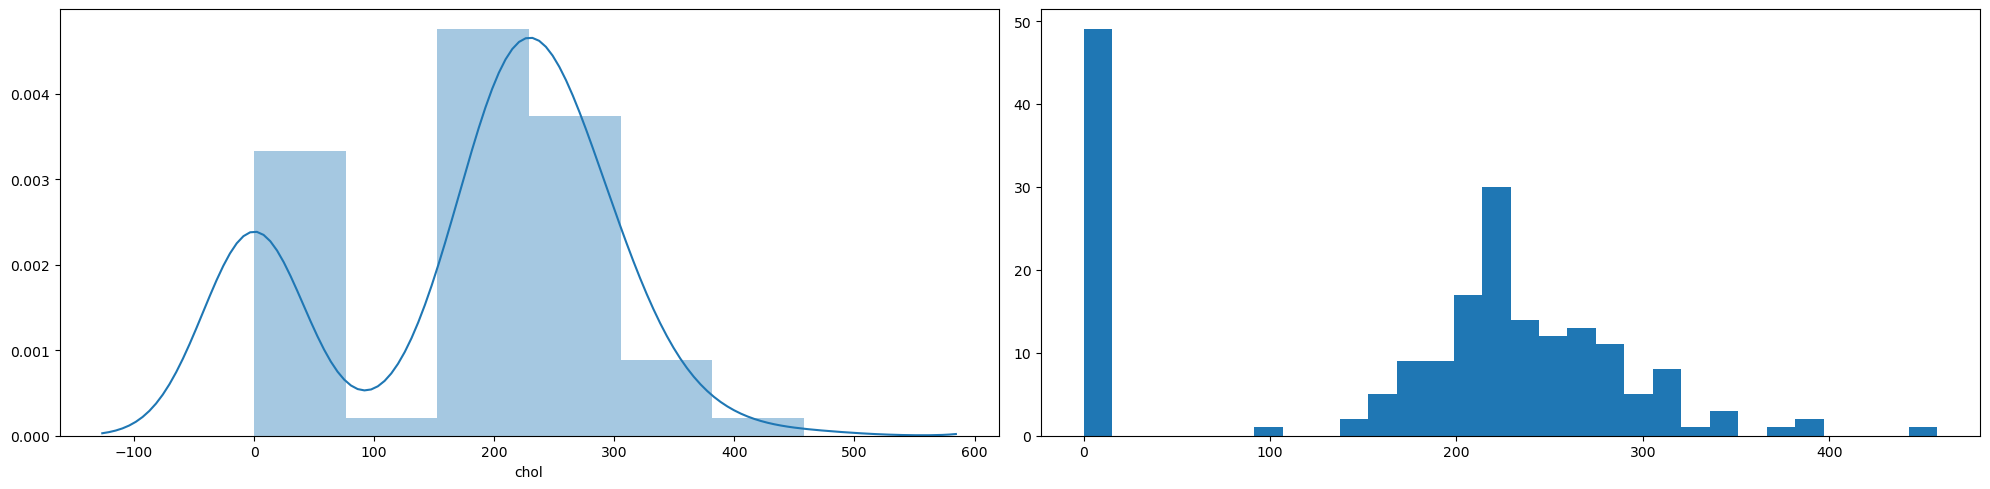

In [437]:
fig = fig_this_size(20,5)

fig.add_subplot(121)
sns.distplot(df.chol)

fig.add_subplot(122)
plt.hist(df.chol,bins=30)
plt.tight_layout()

* Cholestrol in heart patient is of 2 range types.
    * 0 and above 100 .
    * Cholestrol level can never be 0.Thus these are missing values and we have to impute them when preprocessing the model for building he model

In [438]:
# rest blood pressure.

In [439]:
df.trestbps.describe()

count    144.000000
mean     133.763889
std       21.537733
min        0.000000
25%      120.000000
50%      130.000000
75%      147.000000
max      190.000000
Name: trestbps, dtype: float64

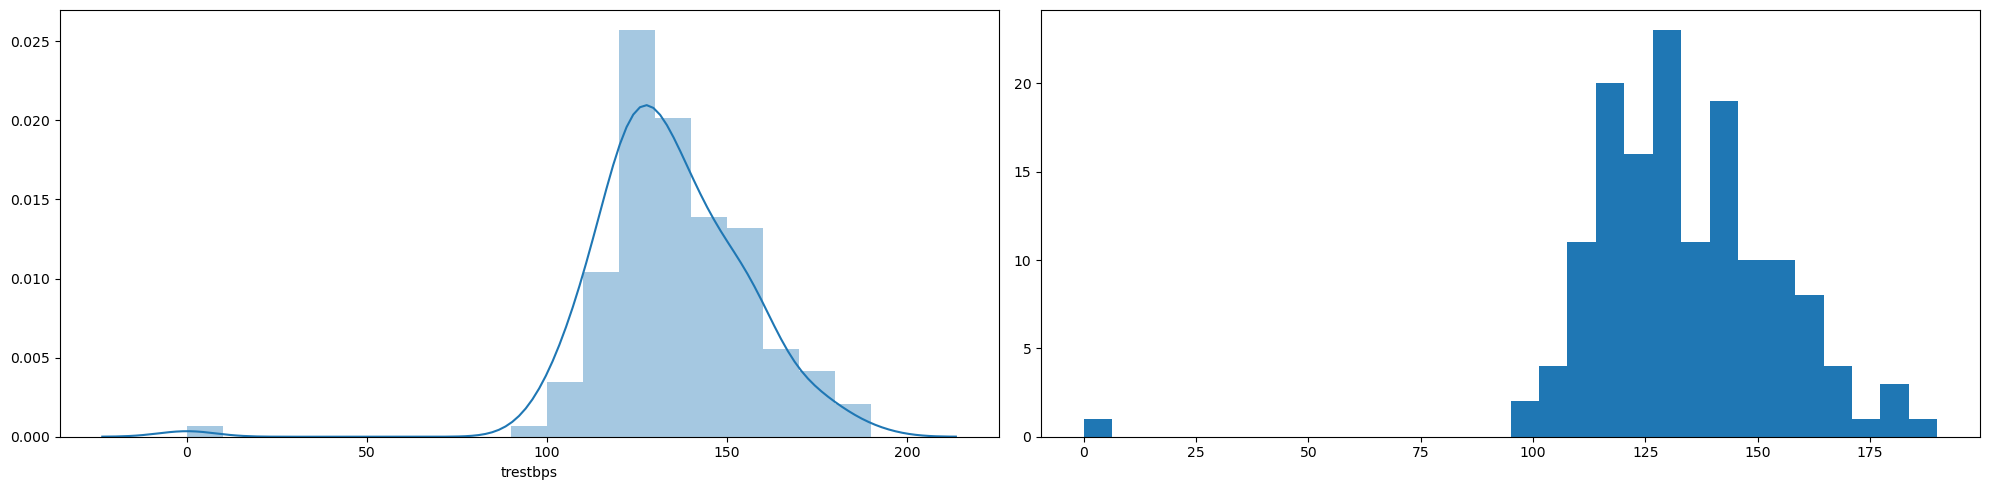

In [440]:
fig = fig_this_size(20,5)

fig.add_subplot(121)
sns.distplot(df.trestbps)

fig.add_subplot(122)
plt.hist(df.trestbps,bins=30)
plt.tight_layout()

* The range of rest blood pressure is around 120 to 564. Higher or lower than this range is problematic.
* We can see that we also have 0 values for trestbps which is only possible if a patient is dead.
* Thus, these 0 vales are also missing values.

In [441]:
# fasting blood sugar(fbs).

* fbs is a binary feature.
* 1 if fbs is greater than 120 mg/dL and 0 otherwise

In [442]:
fbs_dict={0:'Normal FBS',1:'Critical FBS'}

In [443]:
df.fbs.describe()

count    193.000000
mean       0.352332
std        0.478939
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: fbs, dtype: float64

In [444]:
df.fbs.value_counts()

0.0    125
1.0     68
Name: fbs, dtype: int64

In [445]:
df.fbs.value_counts()/len(df) *100

0.0    62.5
1.0    34.0
Name: fbs, dtype: float64

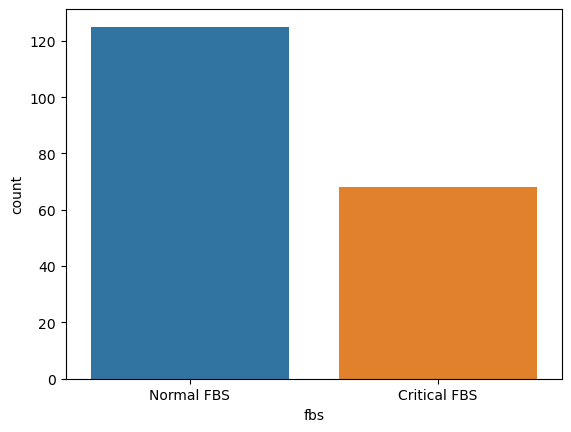

In [446]:
sns.countplot(df.fbs.map(fbs_dict))

* 40% of the patients have critical fasting blooding sugar.
* blood sugar is a heavy contibutor to heart diseases.

In [447]:
# resting ECG results (restecg)

* restecg is a binary feature
* restecg values 0 if the patient haves a normal ecg result and 1 if otherwise

In [448]:
restecg_dict= {0:'Normal ECG',1:'Abnormal ECG'}

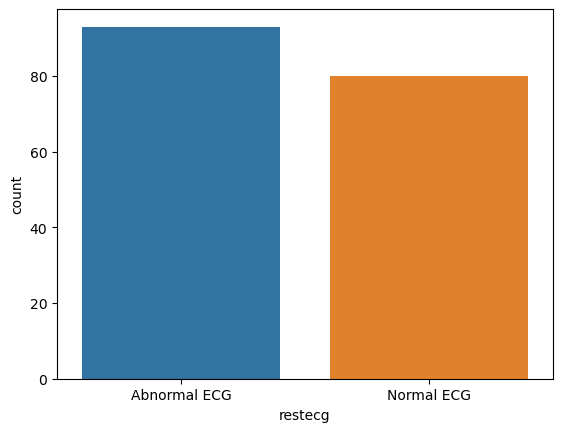

In [449]:
sns.countplot(df.restecg.map(restecg_dict))

* A majority of people have abnormal ecg.
* This is a typical symtom for people with hard diseases.

In [450]:
# exang: exercise induced angina (1 = yes; 0 = no)

* if a person suffer from angina when he/she excerise. This os called as exercise induced induced angina chest pain
* exang is a binary feature.
* 1 if person sufferes from angina, 0 otherwise.

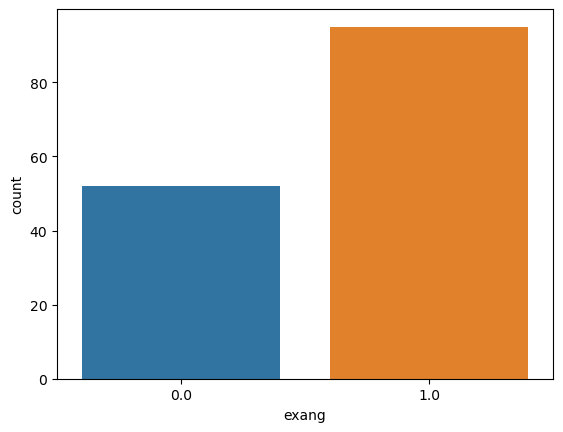

In [451]:
sns.countplot(df.exang)

* most of the patients suffer from exercise induced angia chest pain.

In [452]:
# thalach

* thaclach is the maximum heartrate acheived.

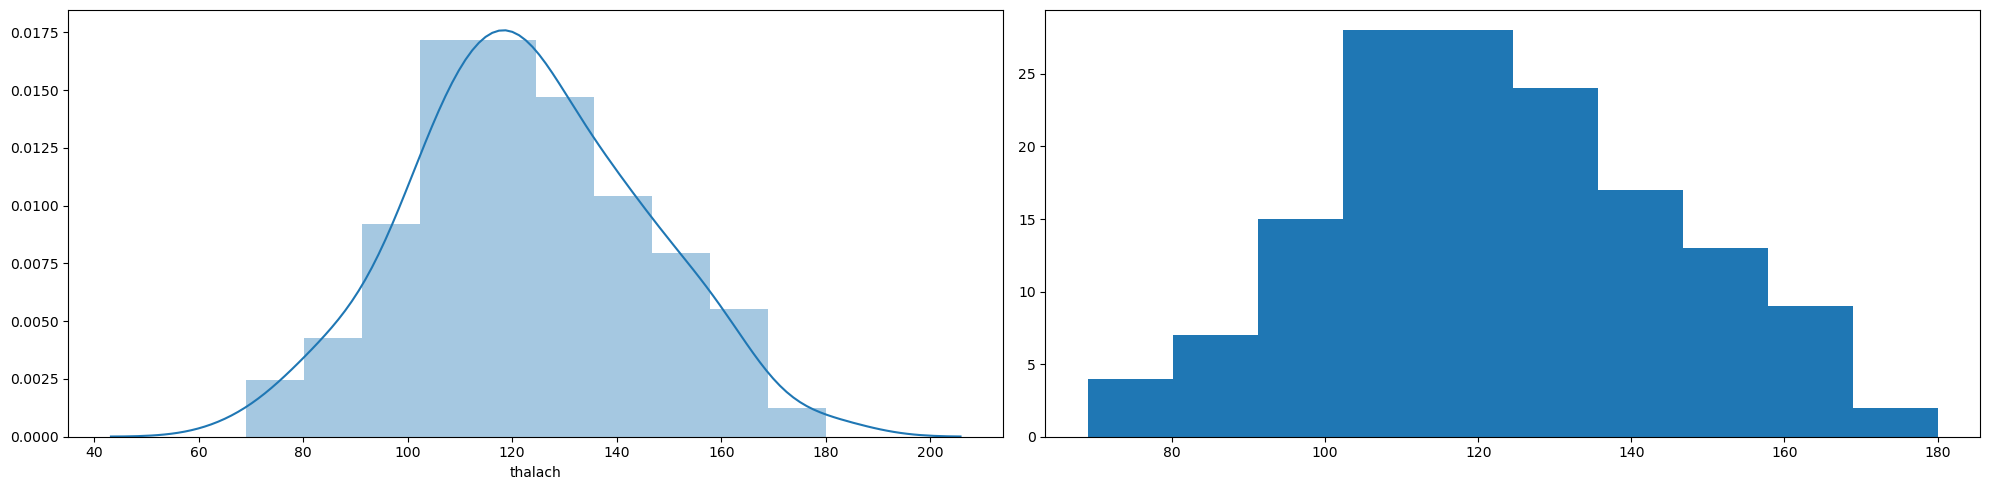

In [453]:
fig = fig_this_size(20,5)

fig.add_subplot(121)
sns.distplot(df.thalach)

fig.add_subplot(122)
plt.hist(df.thalach)
plt.tight_layout()

* Thalach has a good gaussian distribution.

In [454]:
# oldpeak

* Old peak = ST depression induced by exercise relative to rest

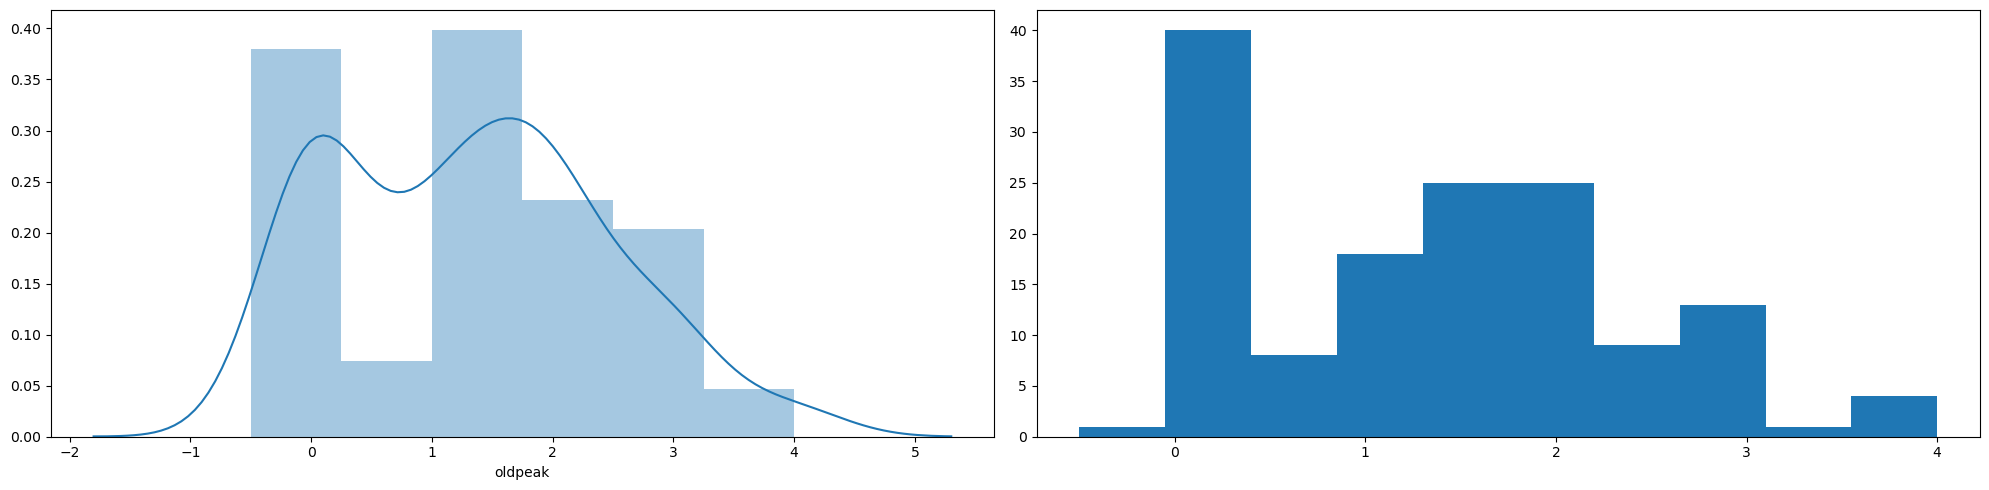

In [455]:
fig = fig_this_size(20,5)

fig.add_subplot(121)
sns.distplot(df.oldpeak)

fig.add_subplot(122)
plt.hist(df.oldpeak)
plt.tight_layout()

* The value of Old-peak can be 0.
* Most of the patient have the oldpeak value as 0.

In [456]:
heart_disease_info

,Description,Domain,Data type,Mean,Standard deviation
Feature,,,,,
Age,—,29–77,Real,54,9
Sex,"Male, female","0, 1",Binary,—,—
Chest pain type,"Angina, asymptomatic, abnormal","1, 2, 3, 4",Nominal,—,—
Resting blood pressure,—,94–200,Real,131.344,17.862
Serum cholesterol in mg/dl,—,126–564,Real,249.659,51.686
Fasting blood sugar > 120 mg/dl,—,"0, 1",Binary,—,—
Resting electrocardiographic results,"Norm, abnormal, hyper","0, 1, 2",Nominal,—,—
Maximum heart rate achieved,—,71–202,Real,149.678,23.1666
Exercise-induced angina,—,"0, 1",Binary,—,—


In [457]:
# slope

* Slope in this dataset referes to the slope of the peak exercise ST segment.
* Slope is an ordinal categorical value with valus:
    * 1: Positive slope(up)
    * 2: No slope(flat)
    * 3: Negative slope(down)
* Positive is the best slope and negative is the worst kind of slope

In [458]:
slope_dict = {1: 'Positive slope(up)',2: 'No slope(flat)',3: 'Negative slope(down)'}

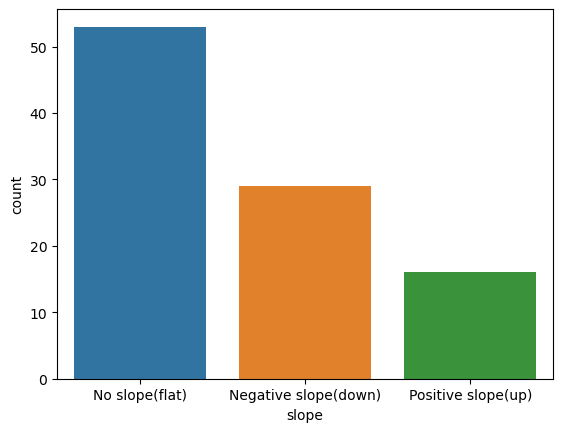

In [459]:
sns.countplot(df.slope.map(slope_dict))

In [460]:
# ca and thal

* ca: number of major vessels (0-3) colored by flourosopy
* thal :Thalassemia is an inherited blood disorder in which the body makes an abnormal form of hemoglobin.

* ca is a numerical datatype feature.

* thal is a categorical type feature

In [461]:
# 'num' (target feature)

In [462]:
df.num.value_counts()

1    56
0    51
3    42
2    41
4    10
Name: num, dtype: int64

* Num is the value of Heart Disease (with 0 being None and 4 being the highest)

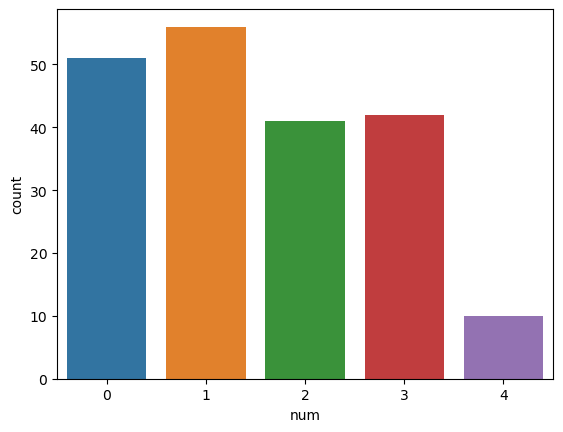

In [463]:
plt
sns.countplot(df.num)

* most of the classes are balanced in the dataset. Just instnaces with vale:4 heart disease is rare.

#### Issues in the Dataset
* More than 90 percent of the values are mising from these 2 features.
* Thus infernces are harder to plot just by 10 percent of the total value.

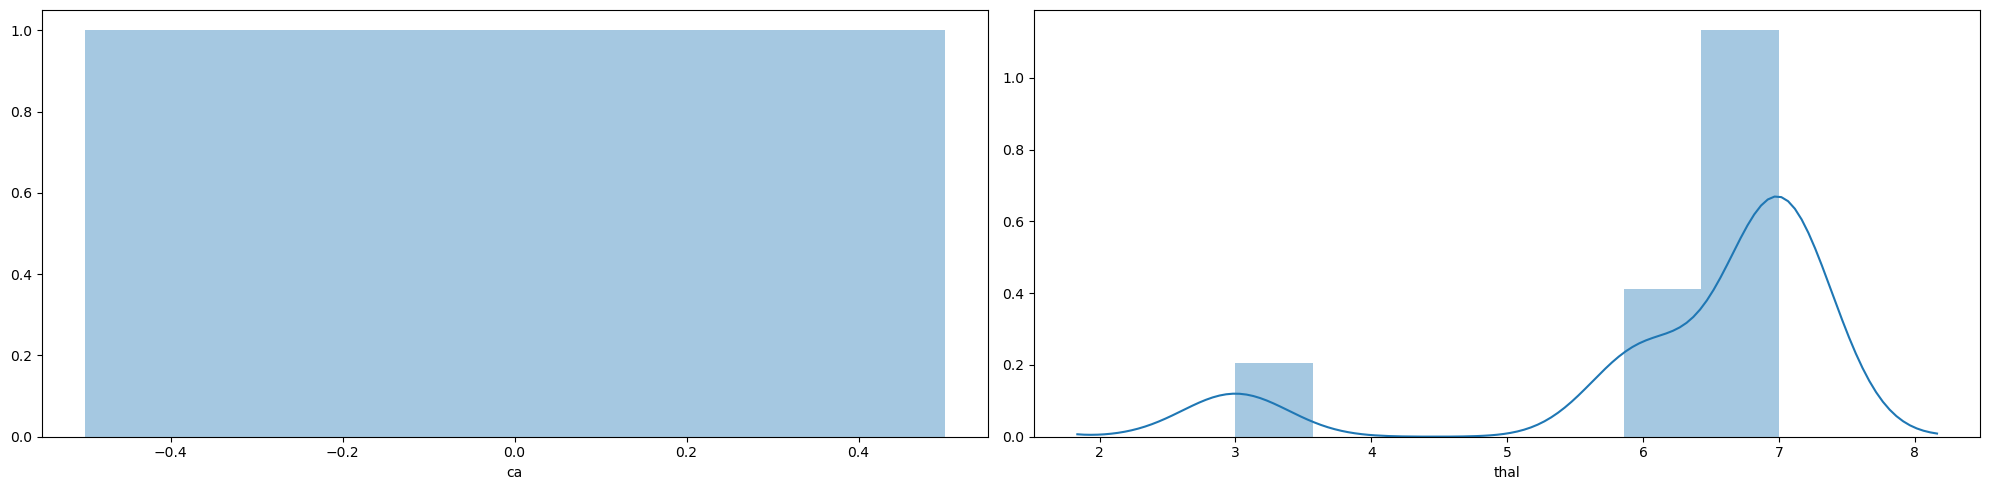

In [464]:
fig = fig_this_size(20,5)

fig.add_subplot(121)
sns.distplot(df.ca)

fig.add_subplot(122)
sns.distplot(df.thal)
plt.tight_layout()

In [465]:
# Mutivariate Analysis.

In [466]:
heart_disease_info

,Description,Domain,Data type,Mean,Standard deviation
Feature,,,,,
Age,—,29–77,Real,54,9
Sex,"Male, female","0, 1",Binary,—,—
Chest pain type,"Angina, asymptomatic, abnormal","1, 2, 3, 4",Nominal,—,—
Resting blood pressure,—,94–200,Real,131.344,17.862
Serum cholesterol in mg/dl,—,126–564,Real,249.659,51.686
Fasting blood sugar > 120 mg/dl,—,"0, 1",Binary,—,—
Resting electrocardiographic results,"Norm, abnormal, hyper","0, 1, 2",Nominal,—,—
Maximum heart rate achieved,—,71–202,Real,149.678,23.1666
Exercise-induced angina,—,"0, 1",Binary,—,—


In [467]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Disease
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2,1
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2,1
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2,1
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0,0


(75.0, 300.0)

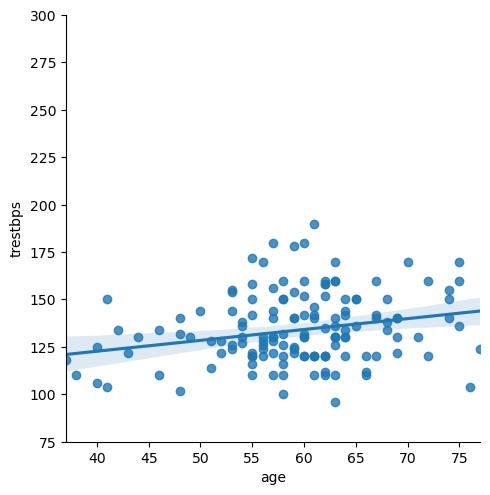

In [468]:
# Age vs trestbps
sns.lmplot('age','trestbps',df.dropna(subset=['trestbps']))
plt.ylim([75,300])

* There is slight positive linear relation betwwen the age and rest blood pressure feautre. 

(50.0, 500.0)

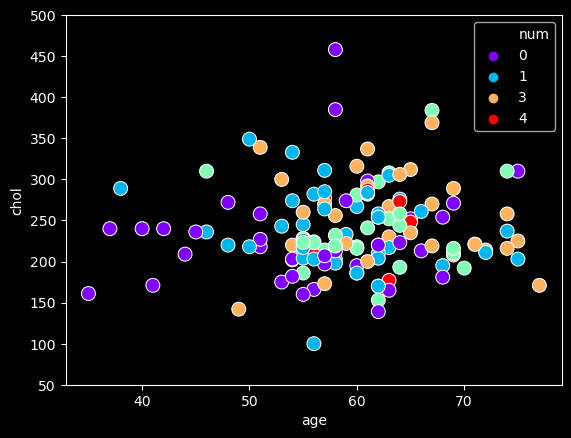

In [469]:
# Age vs cholestrol level
plt.style.use('dark_background')
sns.scatterplot(df.age,df.chol,hue=df.num,s=100,palette='rainbow')
plt.ylim([50,500])

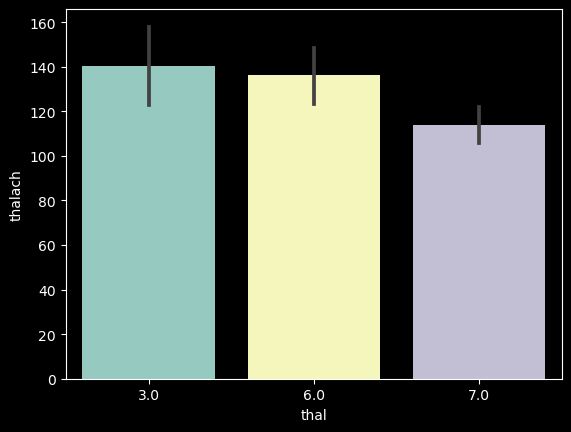

In [470]:
# thal vs thalach
sns.barplot(df.thal,df.thalach)

In [471]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Disease
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2,1
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2,1
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2,1
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0,0


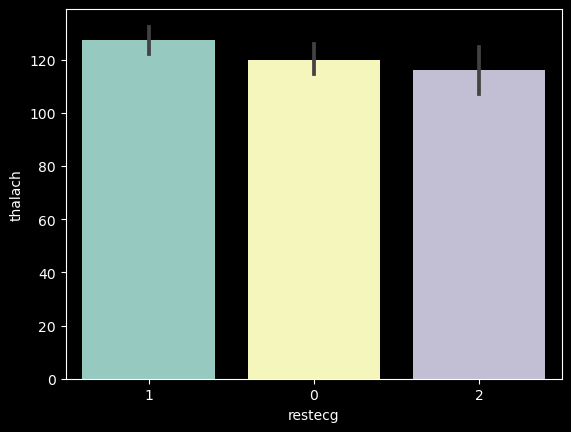

In [472]:
# restecg vs thalach

sns.barplot(df.restecg,df.thalach,order=df.restecg.value_counts().index)

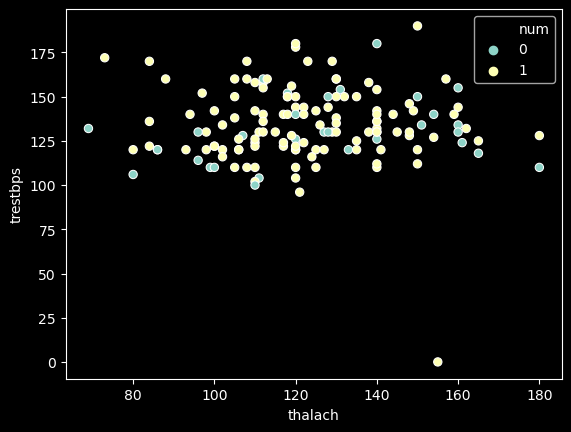

In [473]:
# age vs thalach
sns.scatterplot(df.thalach,df.trestbps,hue=df.num.where(df.num==0,1))

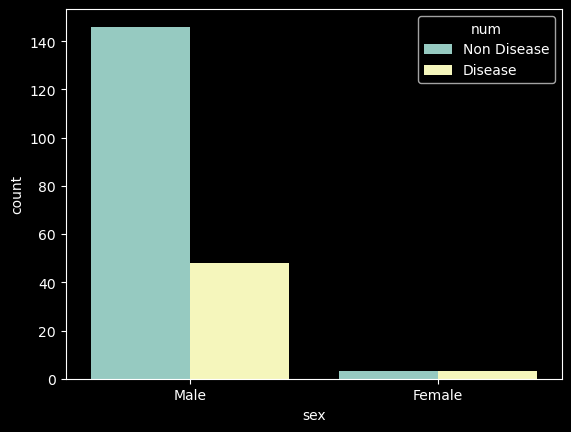

In [474]:
# sex vs disease
sns.countplot(df.sex.map({0:'Female',1:'Male'}),hue=df.num.where(df.num == 0,1).map({0:'Disease',1:'Non Disease'}))

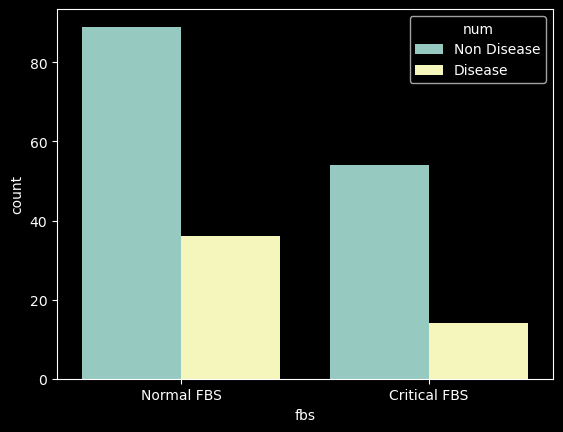

In [475]:
sns.countplot(df.fbs.map(fbs_dict),hue=df.num.where(df.num == 0,1).map({0:'Disease',1:'Non Disease'}))

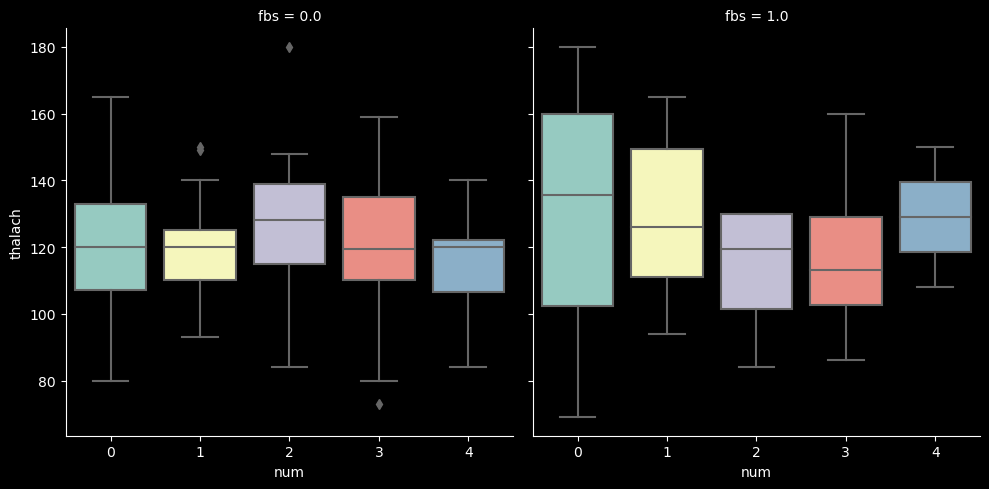

In [476]:
sns.catplot('num','thalach',data=df,kind='box',col='fbs')

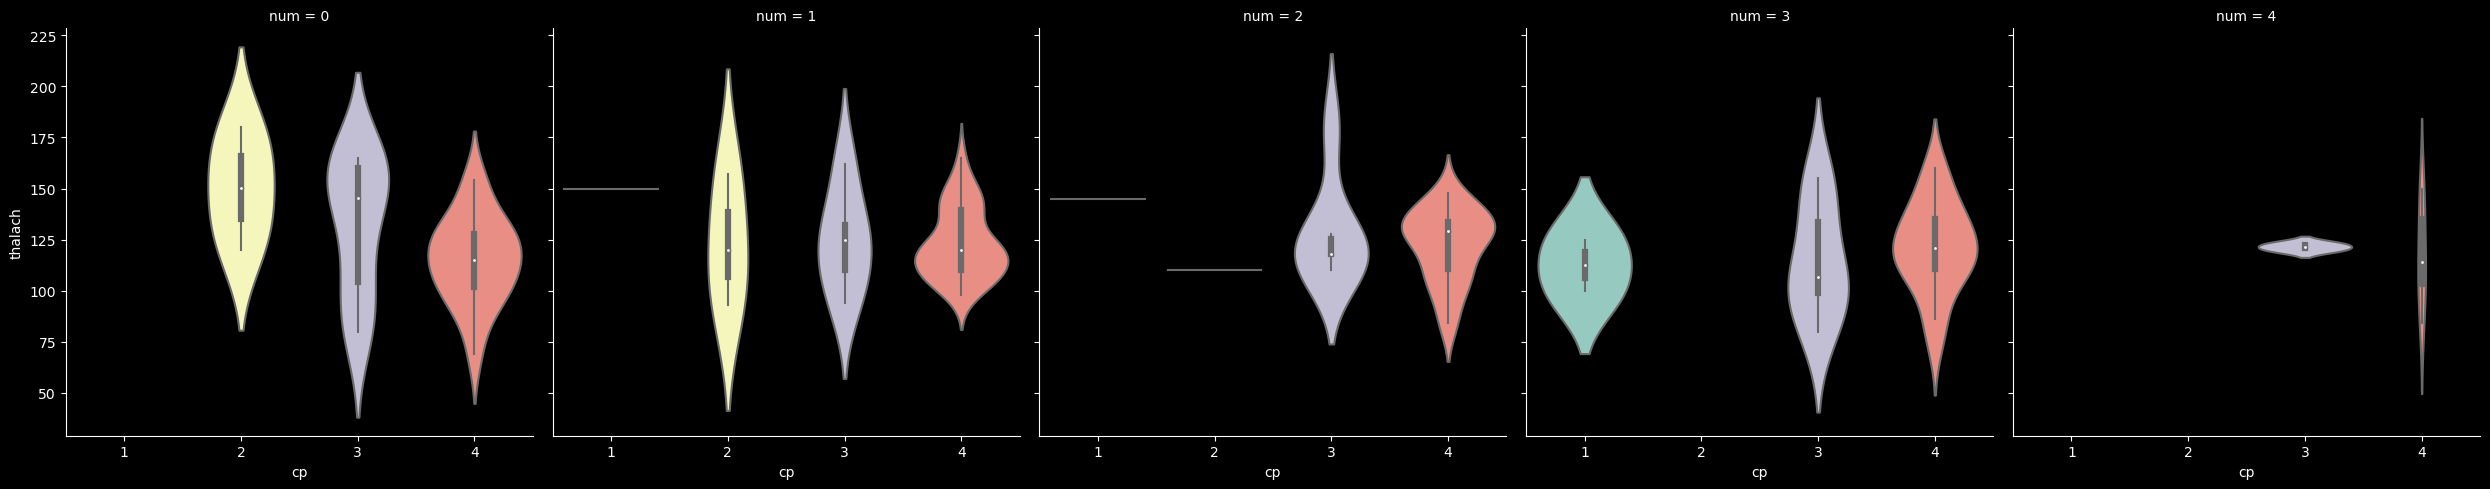

In [477]:
sns.catplot('cp','thalach',data=df,kind='violin',col='num')

In [478]:
px.line(df)

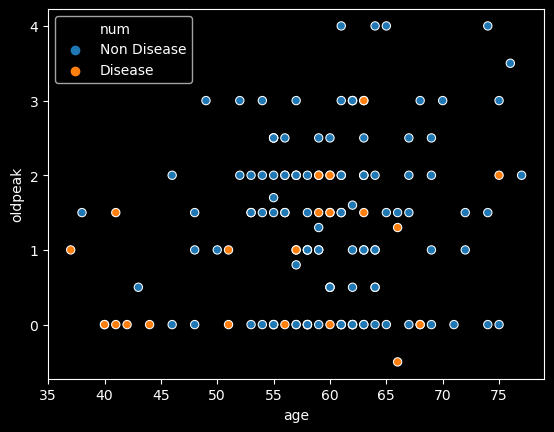

In [479]:
sns.scatterplot(df.age,df.oldpeak,hue=df.num.where(df.num == 0,1).map({0:'Disease',1:'Non Disease'}),palette='tab10')

* we will keep the raw dataset for visualization and we will create a copy of the raw data amd preprocess that copy and use it in the dataframe.
* It is good practice to keep the visualizing dataset and the modelling dataset different.

In [480]:
df_cleaned = df.copy()   # creating a compy of the raw dataframe for preprocessing.

In [481]:
# let's remove the columns `cal` and `thal` form the dataset.
df_cleaned.drop(['ca','thal'],1,inplace=True)

In [482]:
# replace 0 with np.Nan in the features cholestrol and rest blood presure.
df_cleaned.chol.mask(df.chol == 0,np.nan,inplace=True)
df_cleaned.chol.mask(df.chol == 0,np.nan,inplace=True)

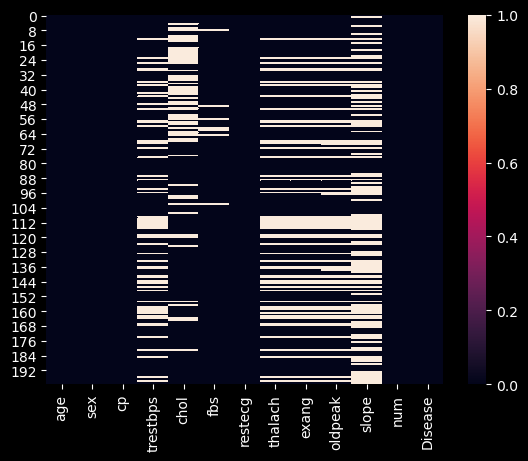

In [483]:
# check the heatmap of the cleaned dataframe
sns.heatmap(df_cleaned.isna())

In [484]:
df_cleaned.isna().sum()

age           0
sex           0
cp            0
trestbps     56
chol         56
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
num           0
Disease       0
dtype: int64

In [485]:
# for the slop feature.

df_cleaned.slope.value_counts()

2.0    53
3.0    29
1.0    16
Name: slope, dtype: int64

In [486]:
# let'sfind the column with no null values which ishighly correlated with the slope feature
df_cleaned.corr()['slope']

age         0.148603
sex         0.124613
cp          0.047762
trestbps    0.109788
chol        0.043986
fbs         0.023457
restecg    -0.027817
thalach    -0.164124
exang       0.149392
oldpeak     0.331319
slope       1.000000
num         0.175687
Disease     0.084862
Name: slope, dtype: float64

* these is no feature which could be realted to the slope feature and used for imputation.
* It's better to drop this column too

In [487]:
df_cleaned.drop('slope',1,inplace=True)

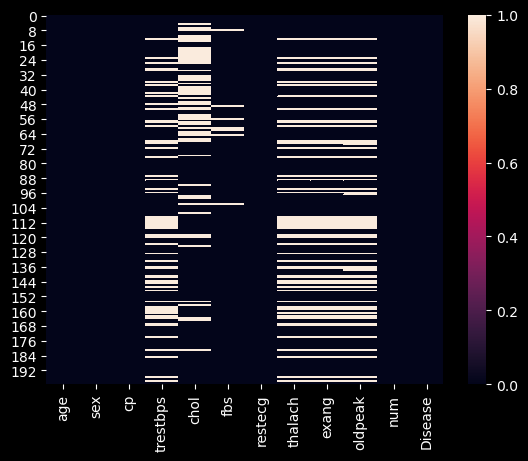

In [488]:
# revised heatmap
sns.heatmap(df_cleaned.isna())

In [489]:
# let's see how much subset removal influence the # samples in the dataset.

In [490]:
df_cleaned = df_cleaned.dropna(subset=['thalach'])

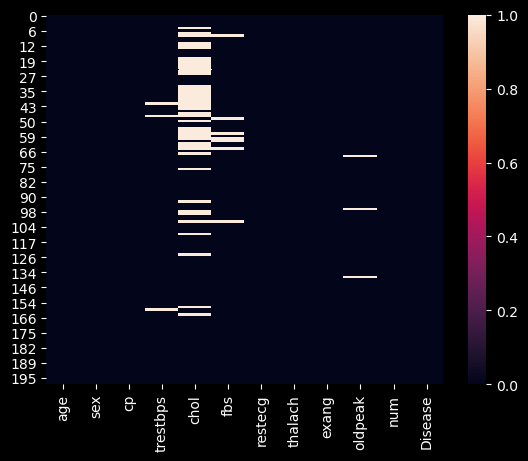

In [491]:
sns.heatmap(df_cleaned.isna())

In [492]:
len(df) - len(df_cleaned)

53

* Removing those 53 element have successfully removed almost all of the missing values fron the dataset.
* This techinque fits here better than removing the feature completely or imputing false missing values.
* We practice imputation when the missing values are under 6% and 10% of the total feature,we have more than 26 percent.

In [493]:
# total missing values revised
df_cleaned.isna().sum()

age          0
sex          0
cp           0
trestbps     3
chol        44
fbs          7
restecg      0
thalach      0
exang        0
oldpeak      3
num          0
Disease      0
dtype: int64

In [494]:
# total missing values percentage revised
df_cleaned.isna().mean()*100

age          0.000000
sex          0.000000
cp           0.000000
trestbps     2.040816
chol        29.931973
fbs          4.761905
restecg      0.000000
thalach      0.000000
exang        0.000000
oldpeak      2.040816
num          0.000000
Disease      0.000000
dtype: float64

In [495]:
# Now let's impute these reamining missing values

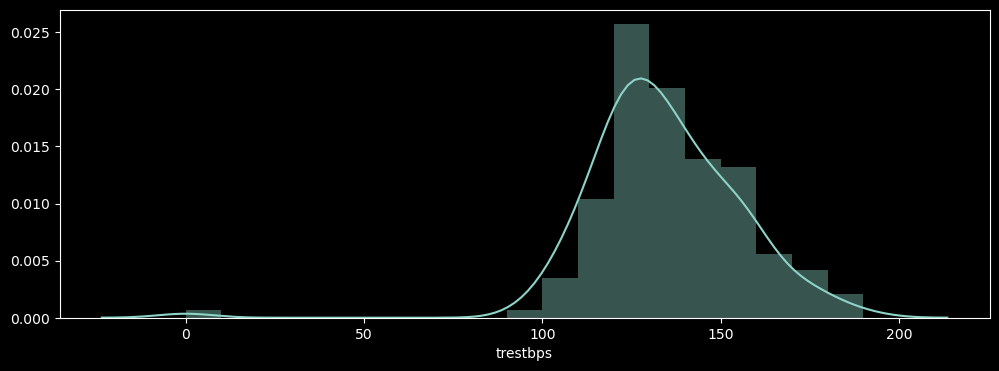

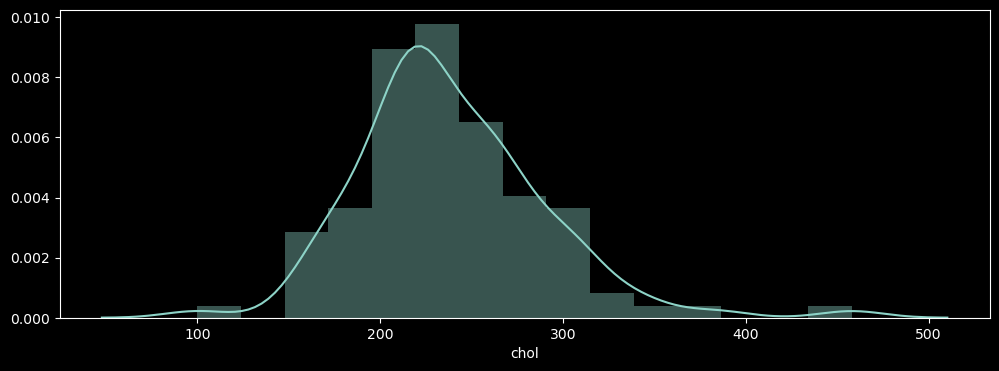

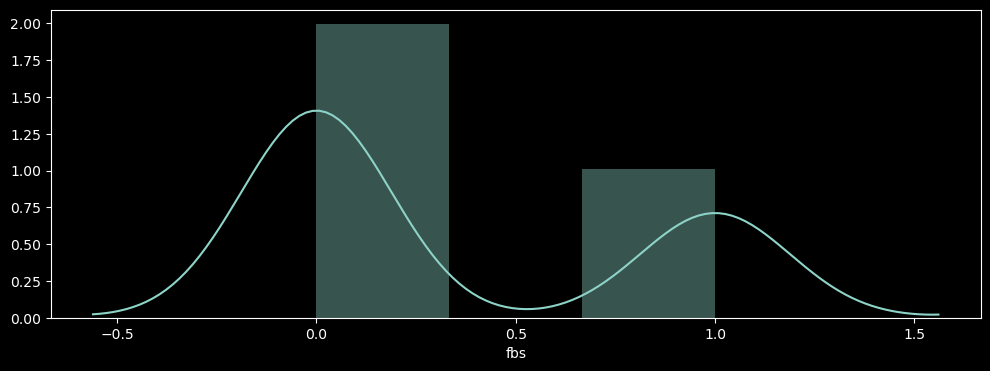

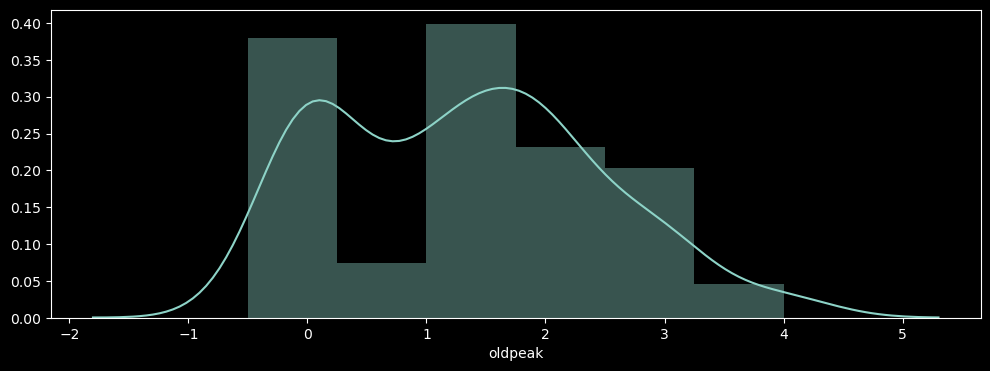

In [496]:
# check the distribution of the missing-values-present-in features.
missing_col = []
for col in df_cleaned.columns:
    
    while any(df_cleaned[col].isna()):
        missing_col.append(col)
        fig_this_size(12,4)
        sns.distplot(df_cleaned[col])
        plt.show()
        break

In [497]:
# let's perform mode imputation as some of the features are skewed

In [498]:
from feature_engine.missing_data_imputers import MeanMedianImputer,EndTailImputer

In [499]:
end_tail_imputer = EndTailImputer(variables=['chol'])

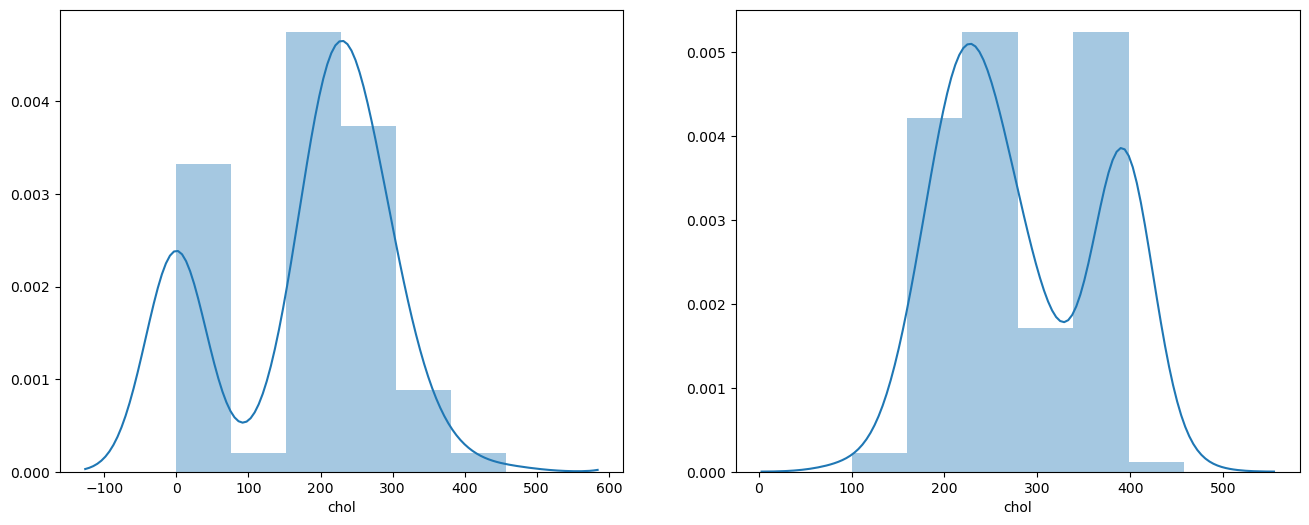

In [500]:
plt.style.use('default')
fig = fig_this_size(16,6)

fig.add_subplot(121)
sns.distplot(df.chol)

fig.add_subplot(122)
sns.distplot(end_tail_imputer.fit_transform(df_cleaned)['chol'])

In [501]:
# this imputation for col works better, let's finalize it.
df_cleaned = end_tail_imputer.fit_transform(df_cleaned)

In [502]:
missing_col

['trestbps', 'chol', 'fbs', 'oldpeak']

In [503]:
missing_col.remove('chol')

In [504]:
missing_col

['trestbps', 'fbs', 'oldpeak']

In [505]:
imputer = MeanMedianImputer(imputation_method='median',variables=missing_col)

In [506]:
df_cleaned = imputer.fit_transform(df_cleaned)

In [507]:
list(zip(df_cleaned.isna().sum(),df_cleaned.isna().sum()))

[(0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0)]

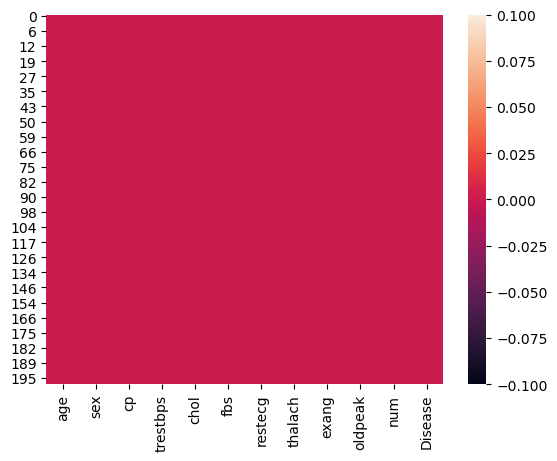

In [508]:
# final heatmap revision
sns.heatmap(df_cleaned.isna())

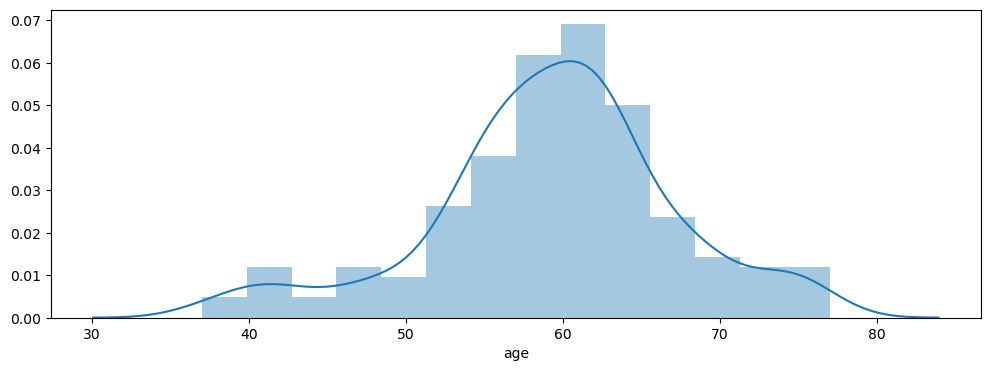

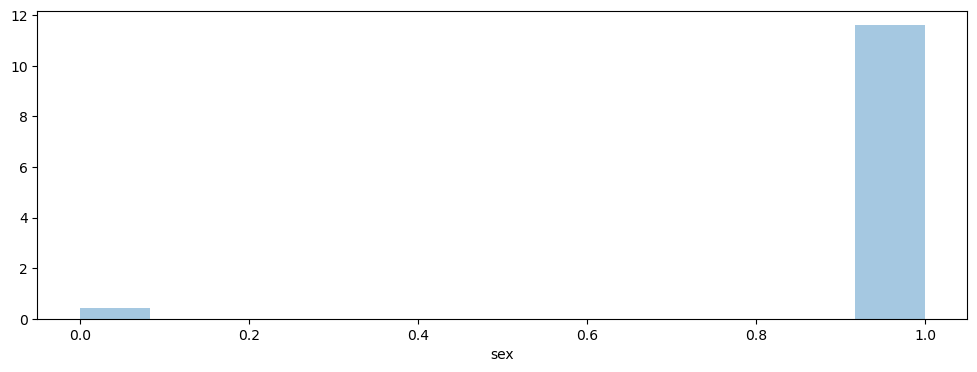

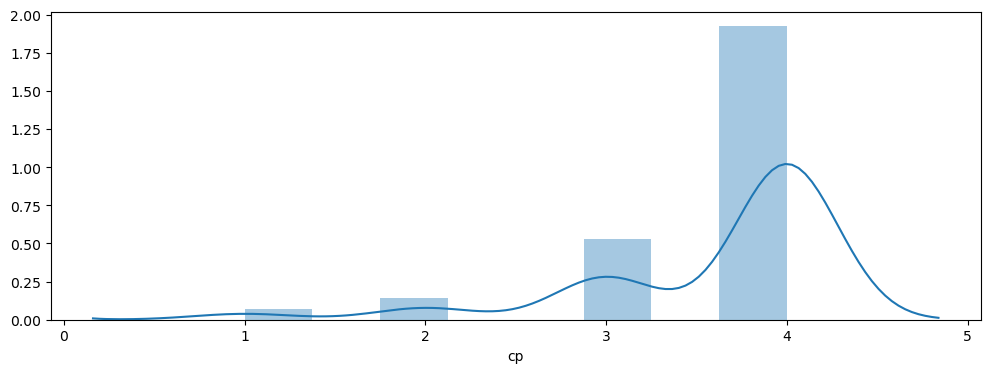

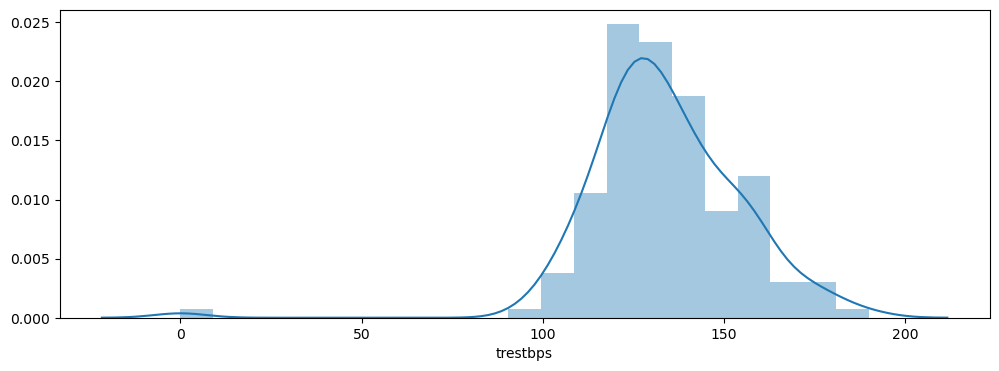

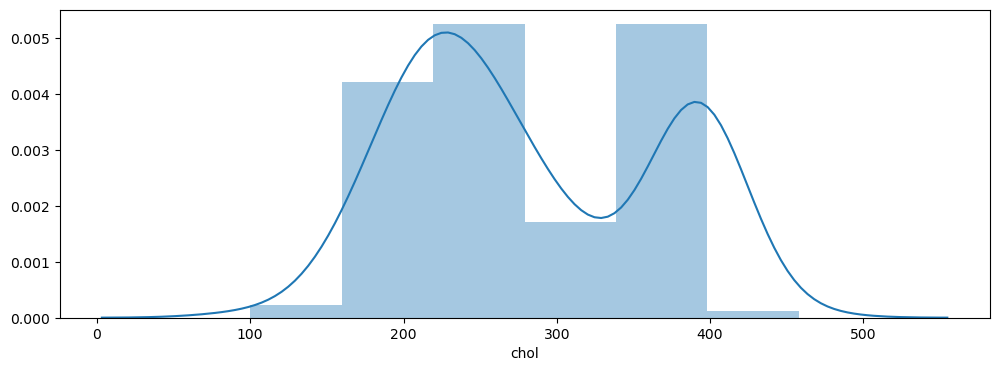

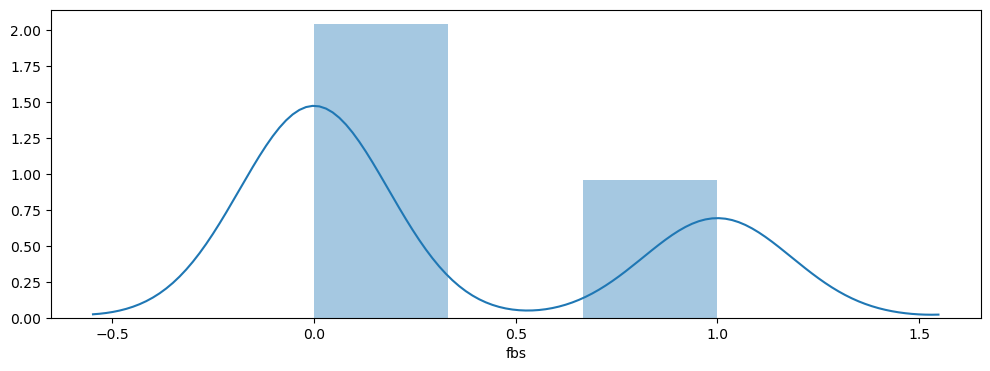

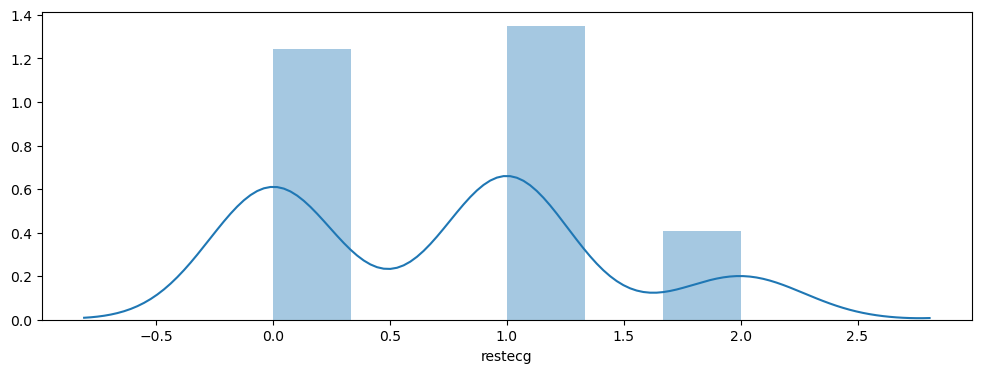

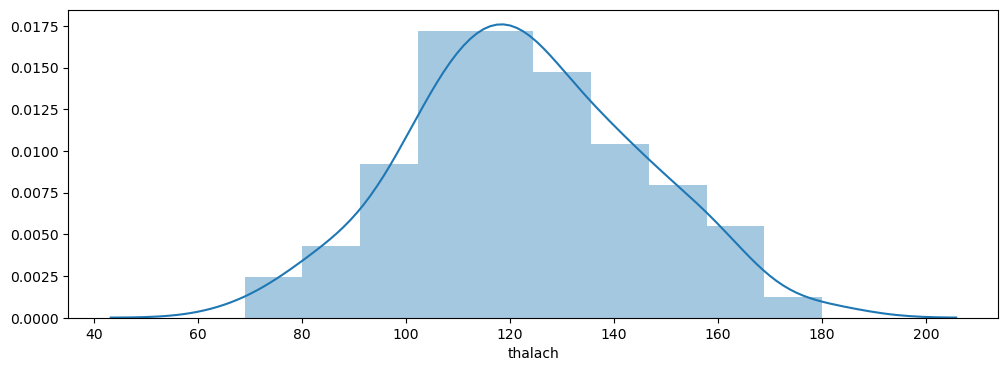

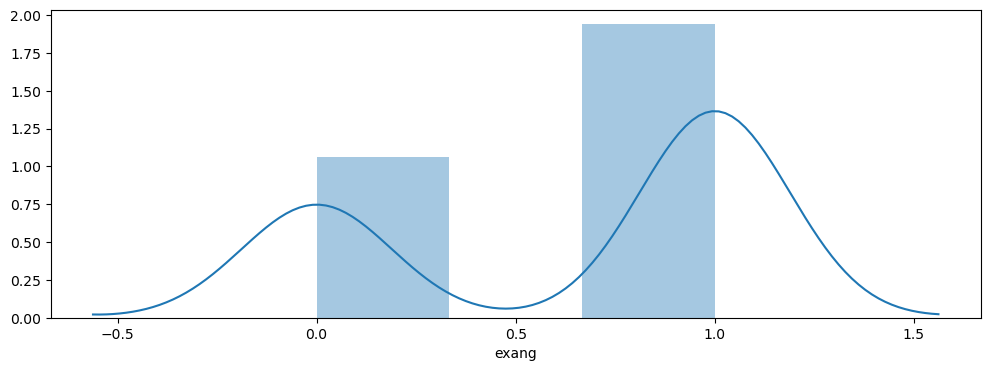

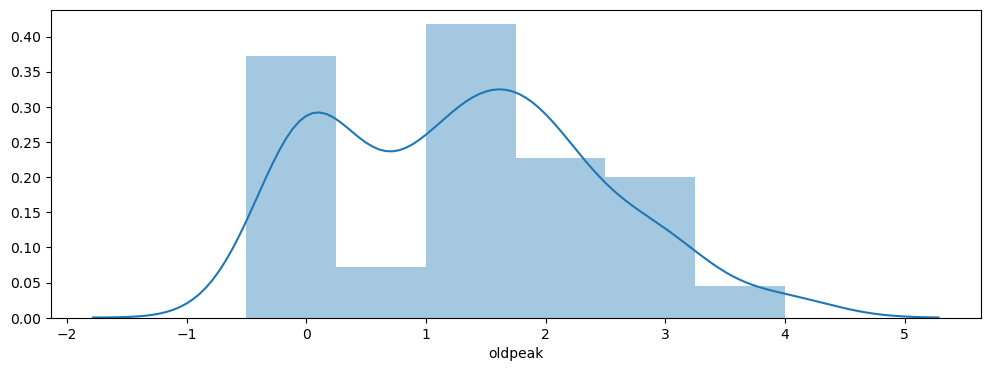

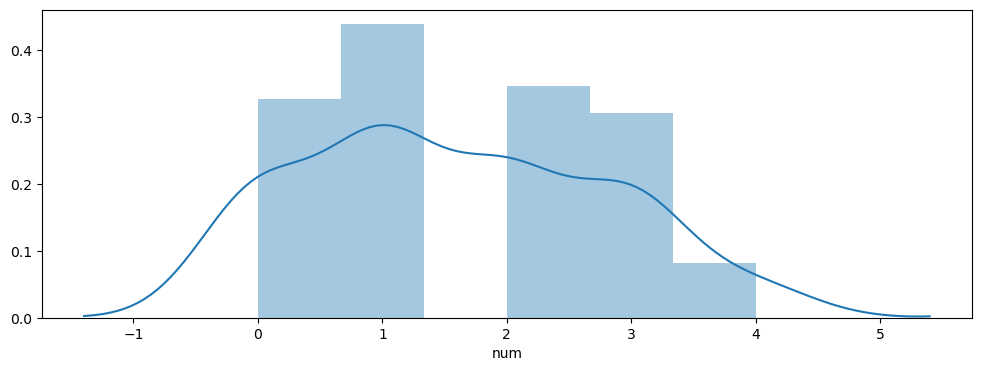

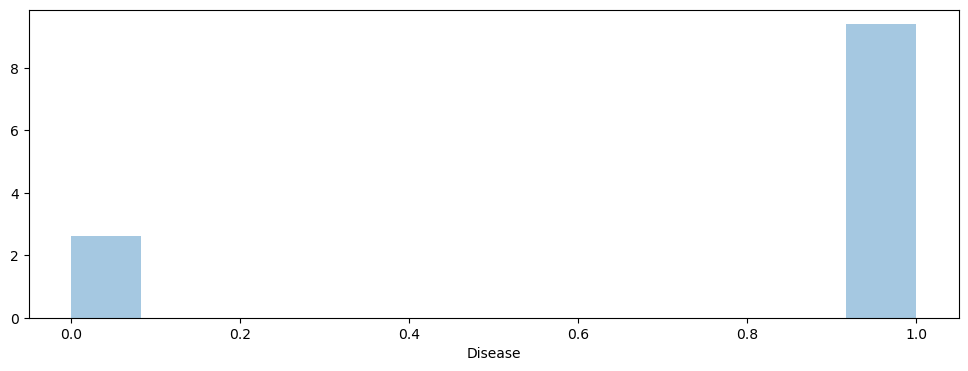

In [509]:
for col in df_cleaned.columns:
    
        fig_this_size(12,4)
        sns.distplot(df_cleaned[col])
        plt.show()

* <b><u>All missing values inputed,</u> Voila!</b>

In [510]:
df_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Disease
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2,1
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,0,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,2,1
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
193,62,1,4,158.0,170.0,0.0,1,138.0,1.0,0.0,1,1
194,46,1,4,134.0,310.0,0.0,0,126.0,0.0,0.0,2,1
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,1,1
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,2,1


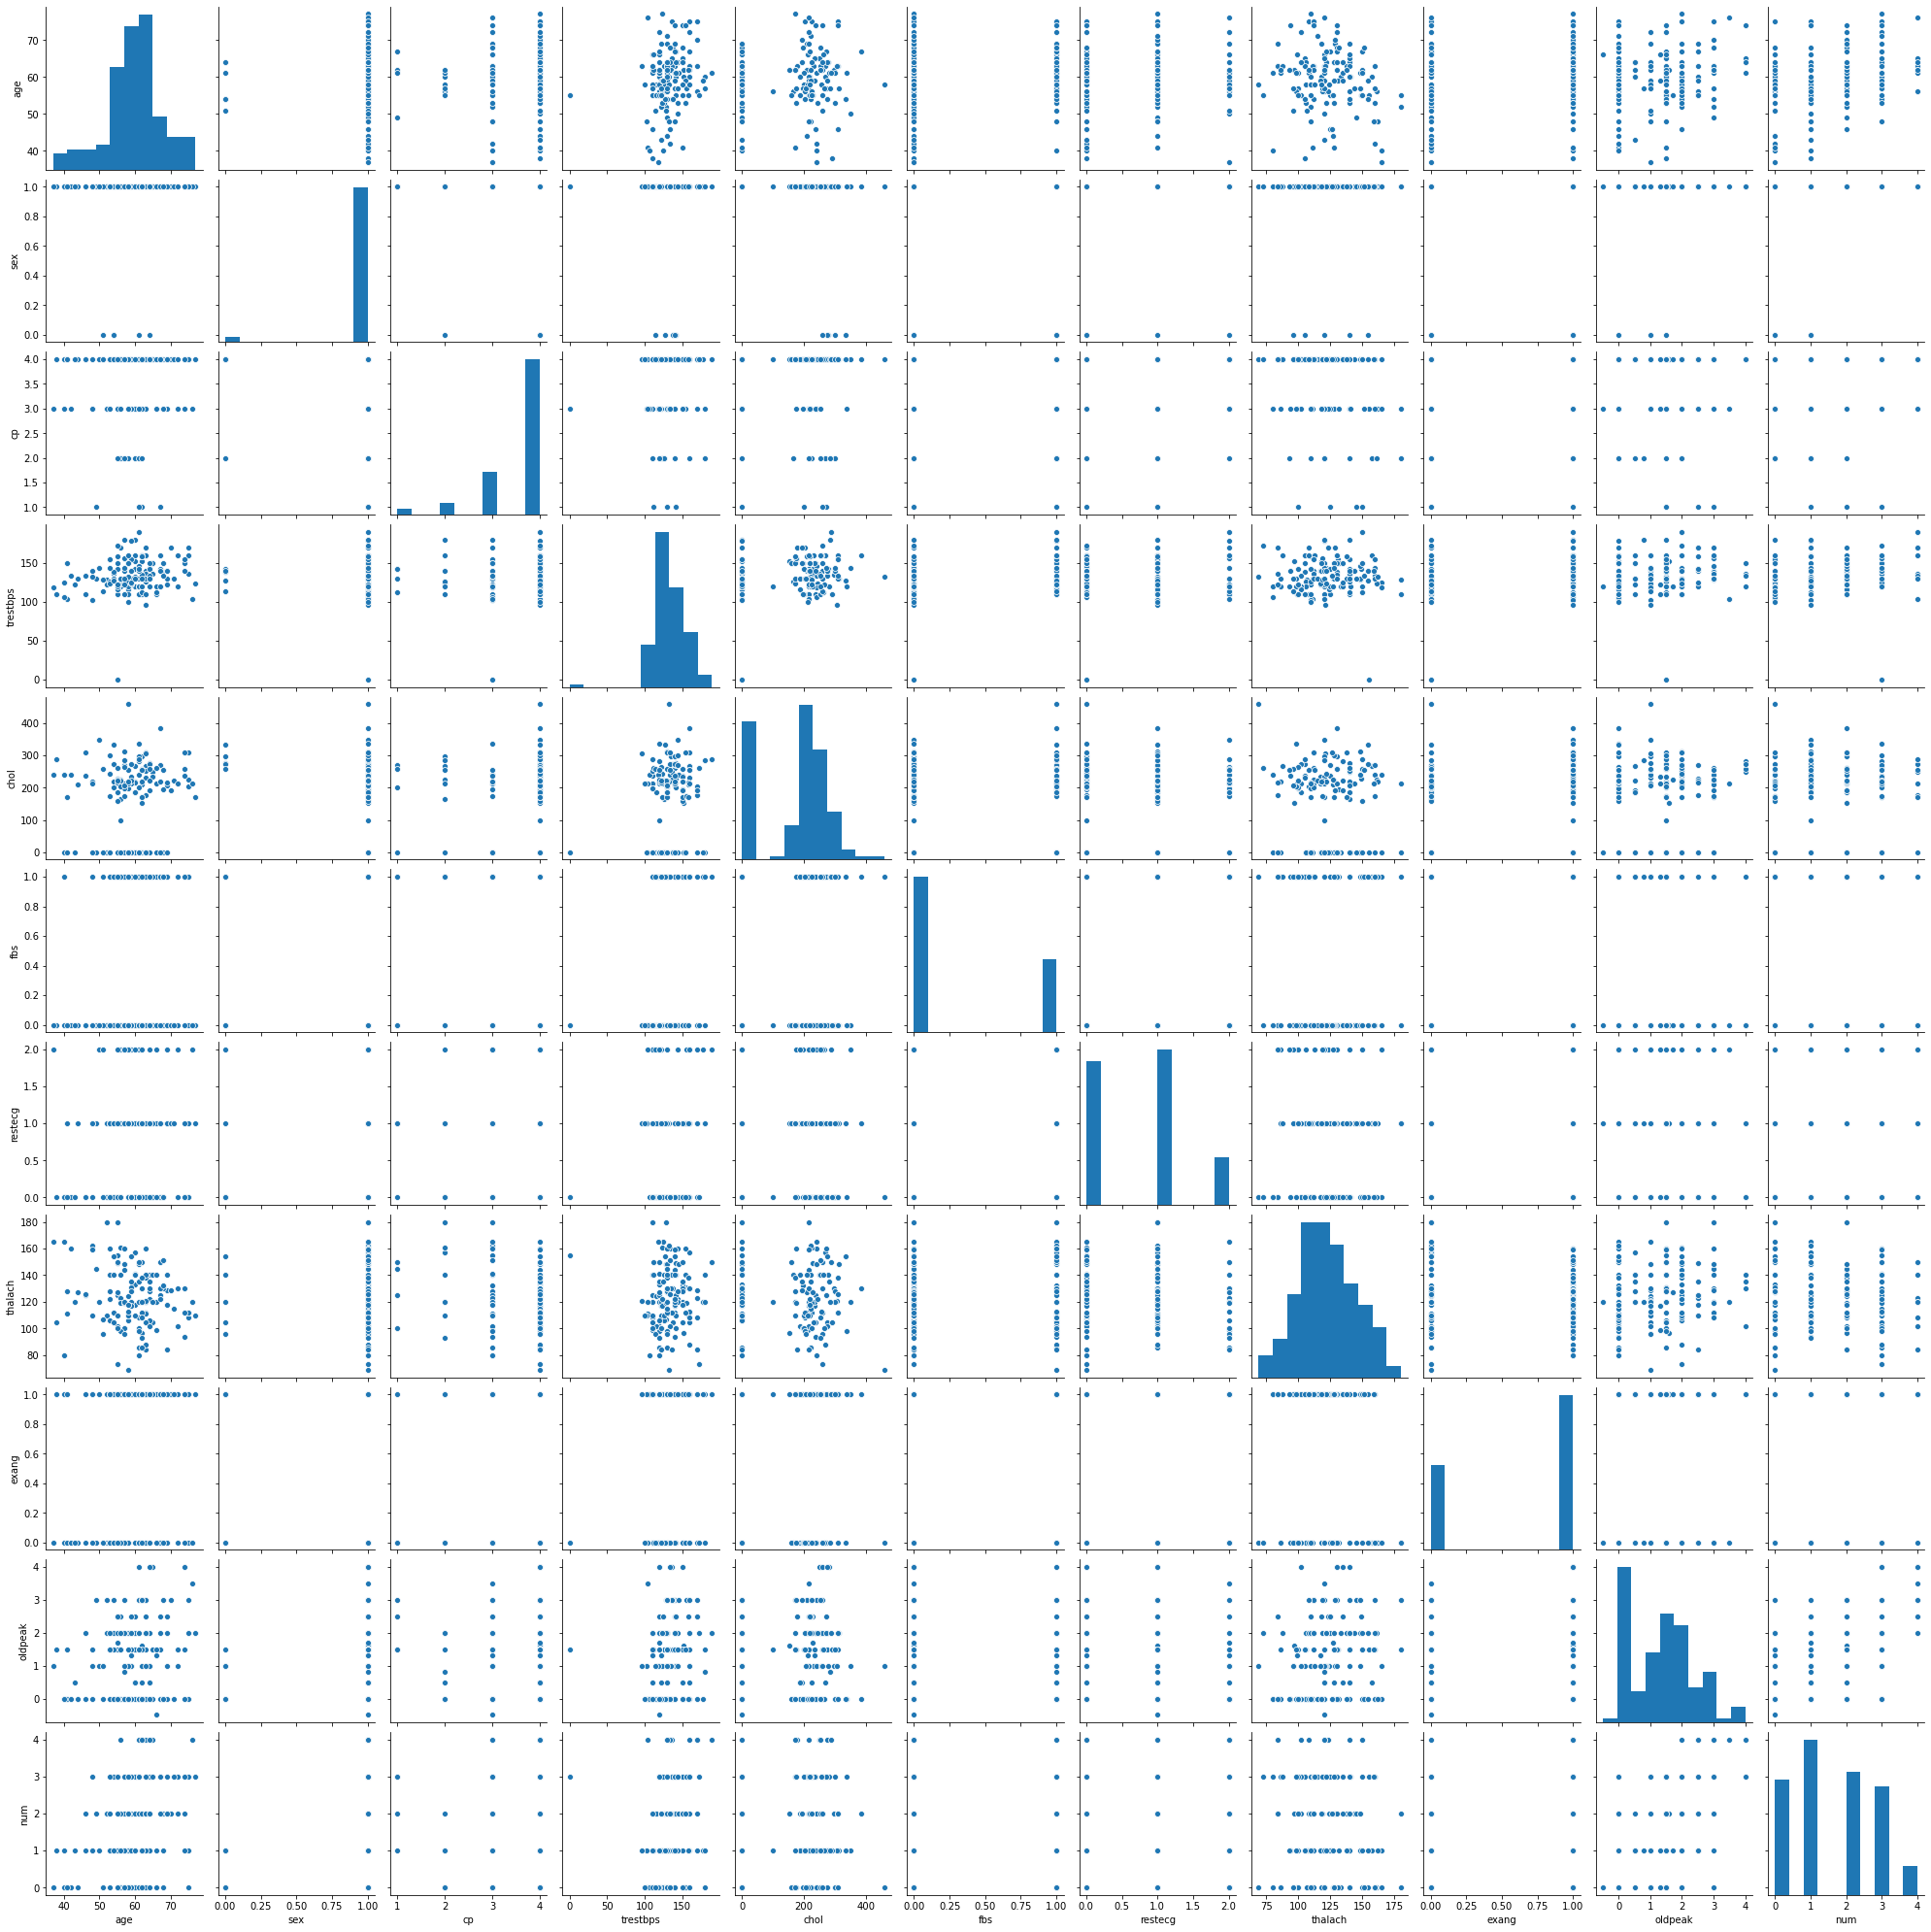

In [150]:
#sns.pairplot(df_cleaned)

In [511]:
# Getting rid of the putliers in the dataset

# we will use z-score to outlier detecin and removal

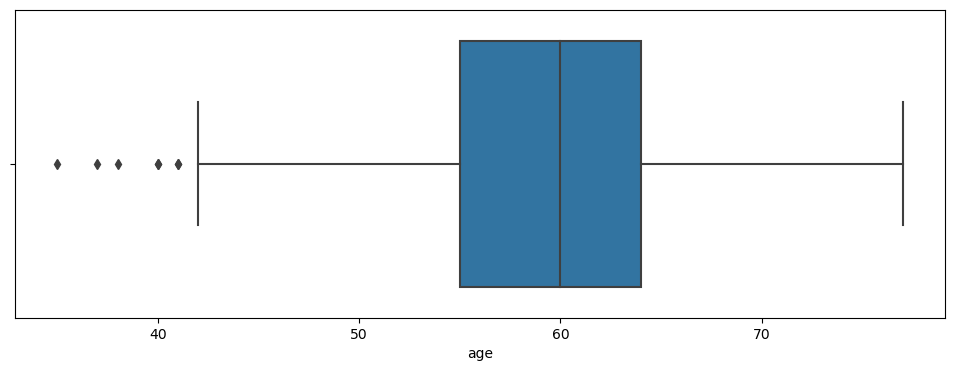

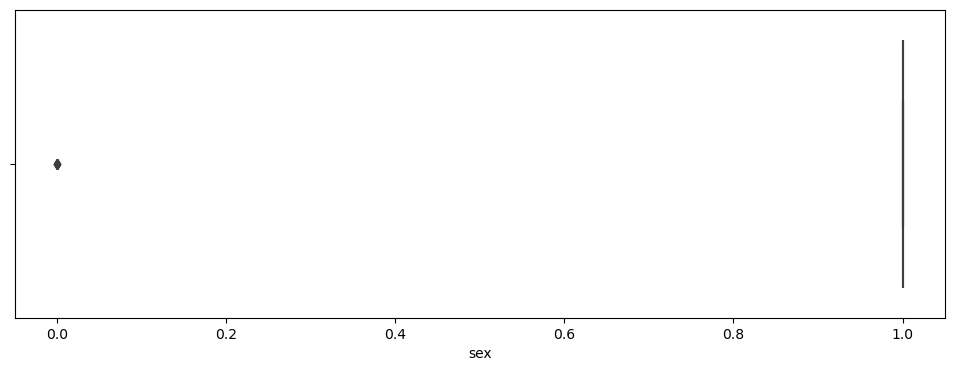

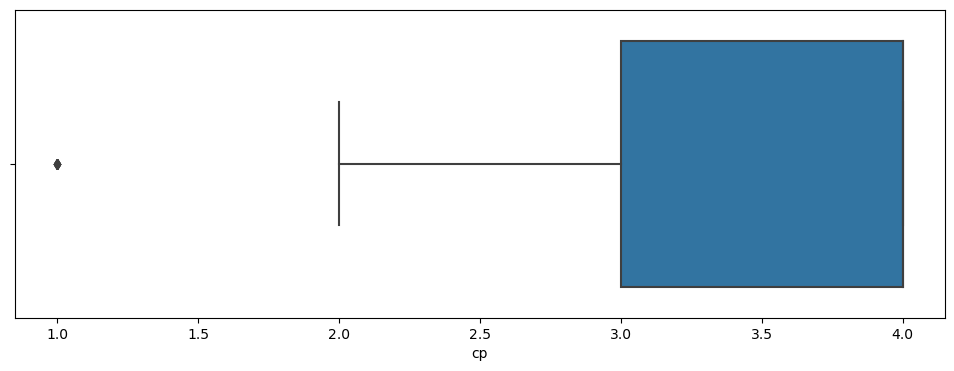

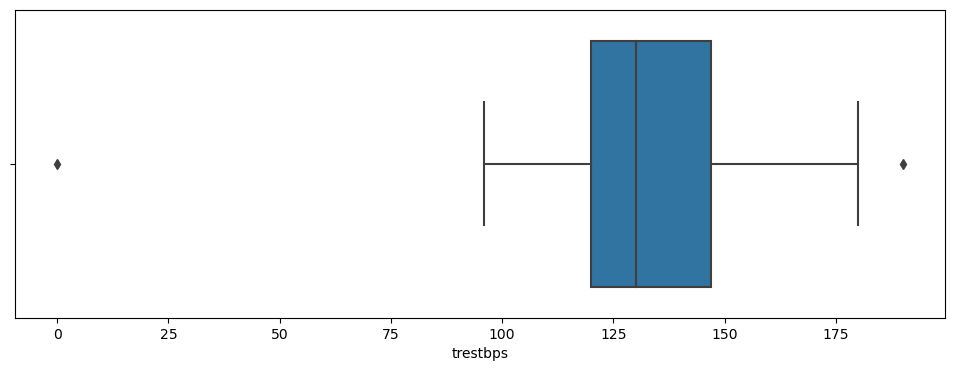

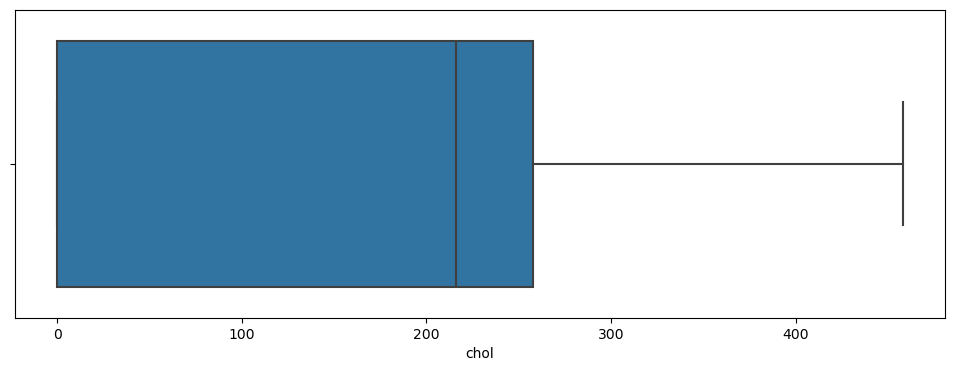

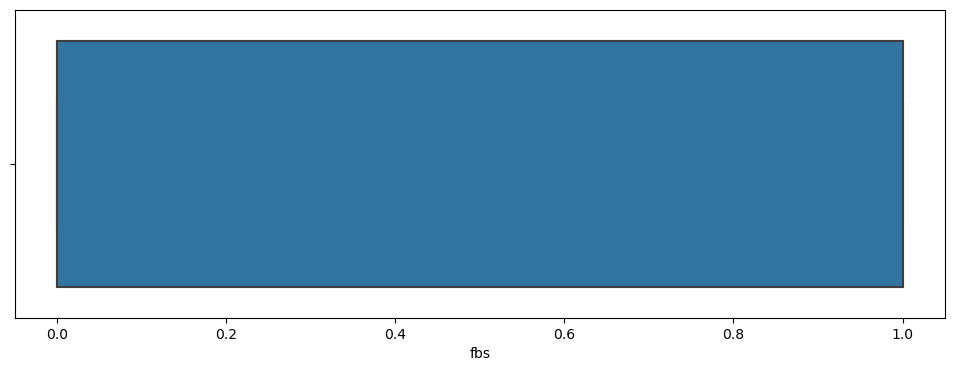

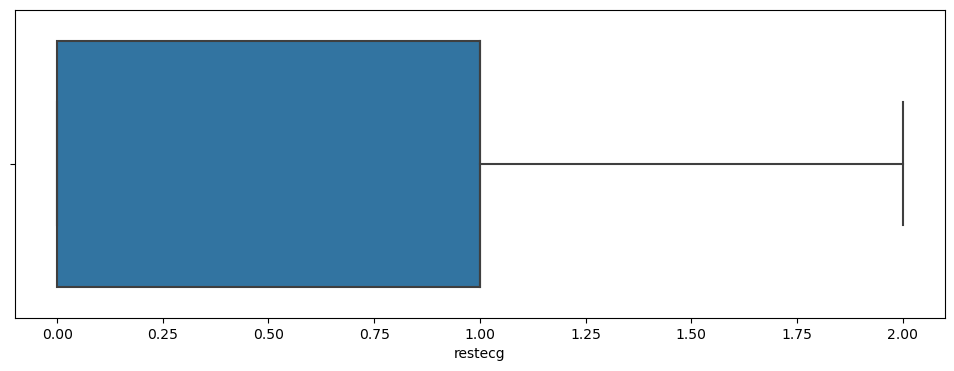

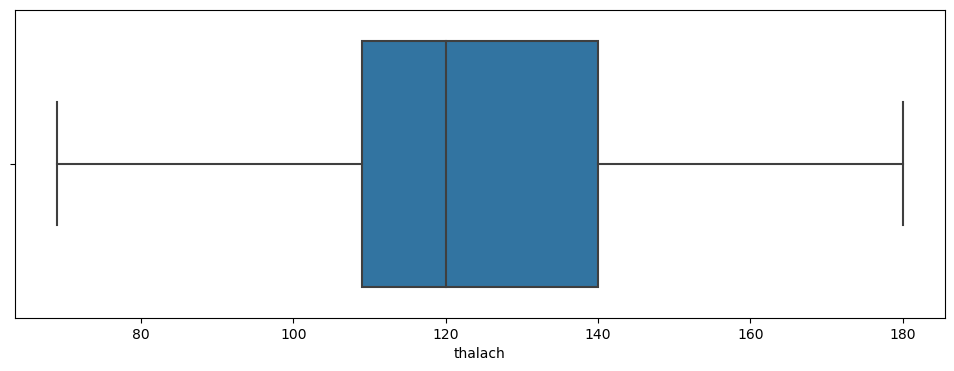

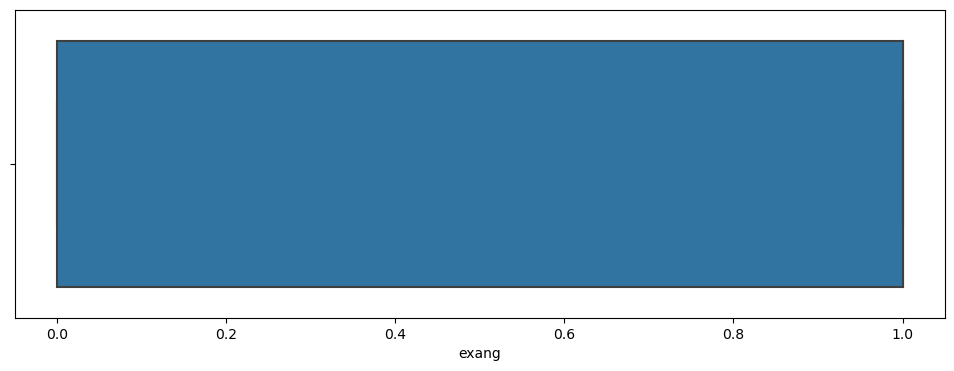

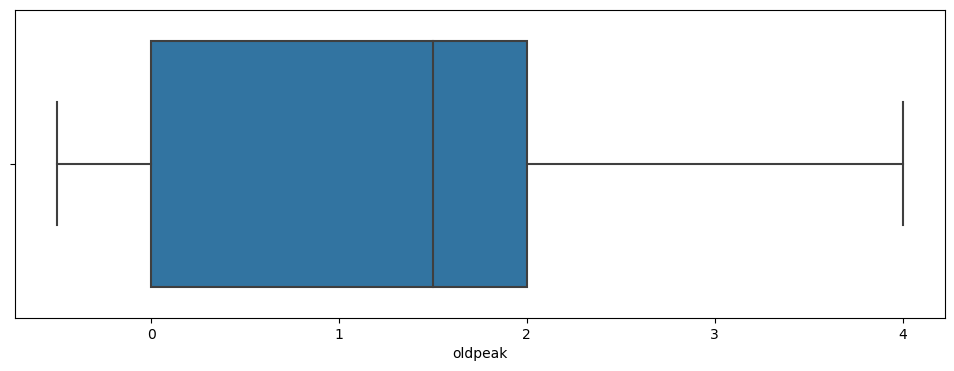

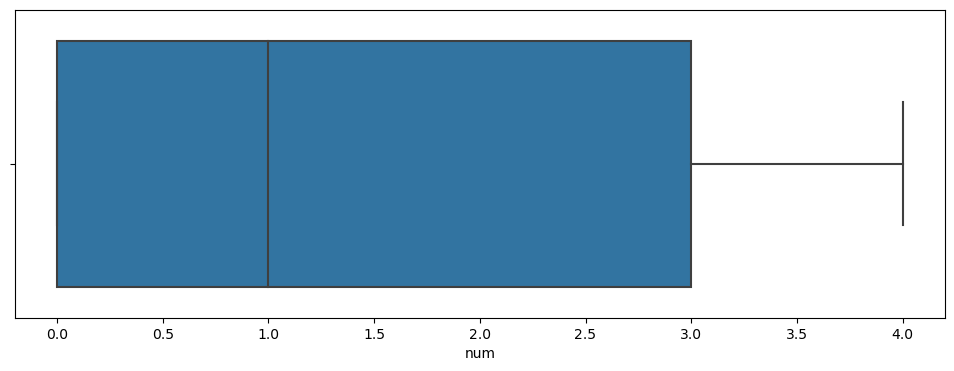

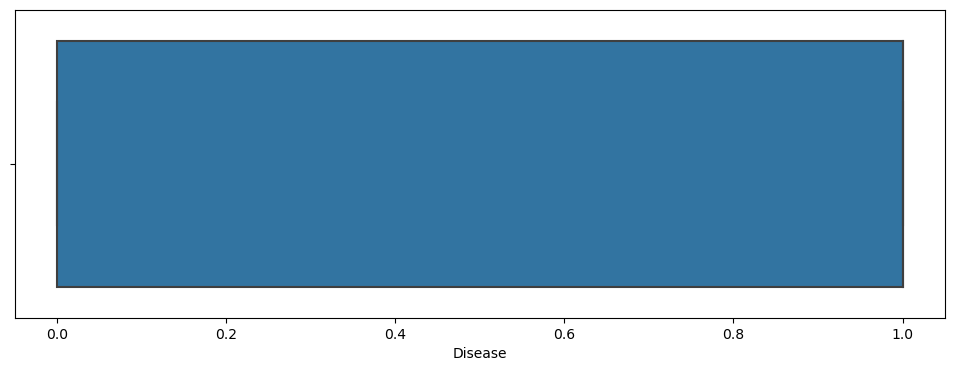

In [512]:
for col in df_cleaned.columns:
    
    fig_this_size(12,4)
    sns.boxplot(df[col])
    plt.show()

In [513]:
# using the z-score method

z_scores = stats.zscore(df_cleaned)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_cleaned_z = df_cleaned[filtered_entries]

In [514]:
# using the iqr method

Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df_cleaned_iqr = df_cleaned[~((df_cleaned < (Q1 - 3 * IQR)) |(df_cleaned > (Q3 + 3 * IQR))).any(axis=1)]

age           8.00000
sex           0.00000
cp            1.00000
trestbps     25.00000
chol        173.45537
fbs           1.00000
restecg       1.00000
thalach      31.00000
exang         1.00000
oldpeak       2.00000
num           2.00000
Disease       0.00000
dtype: float64


In [515]:
len(df_cleaned),len(df_cleaned_z),len(df_cleaned_iqr)

(147, 137, 111)

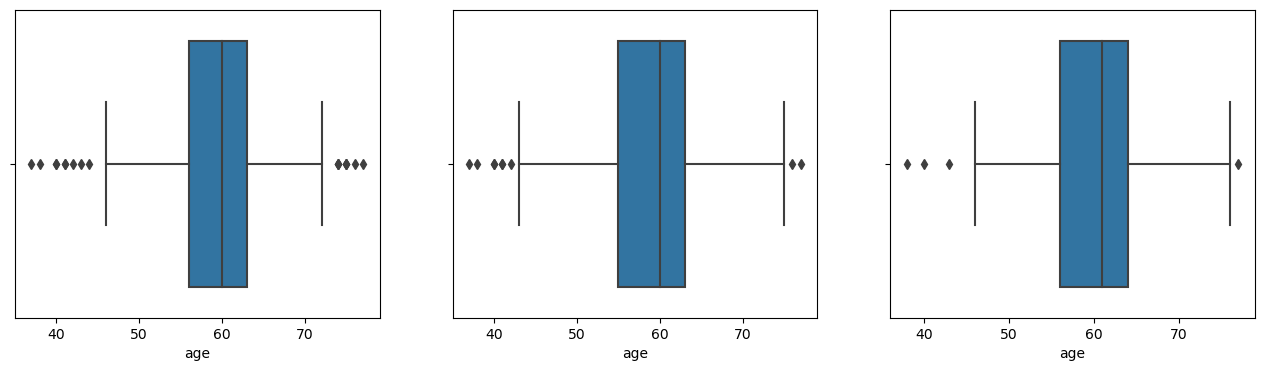

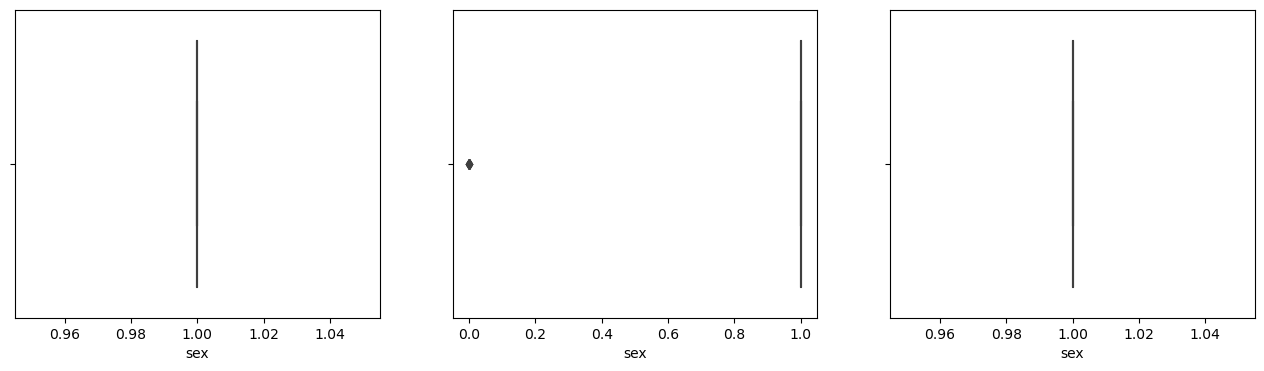

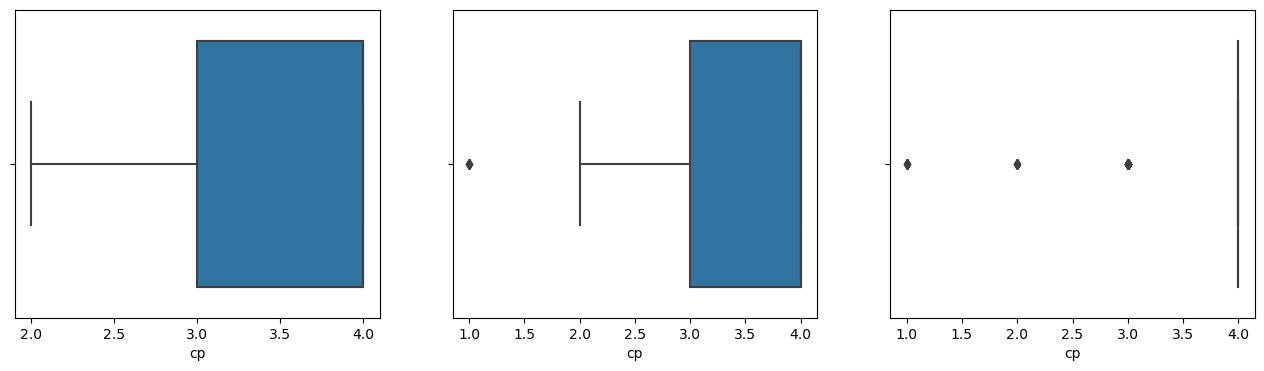

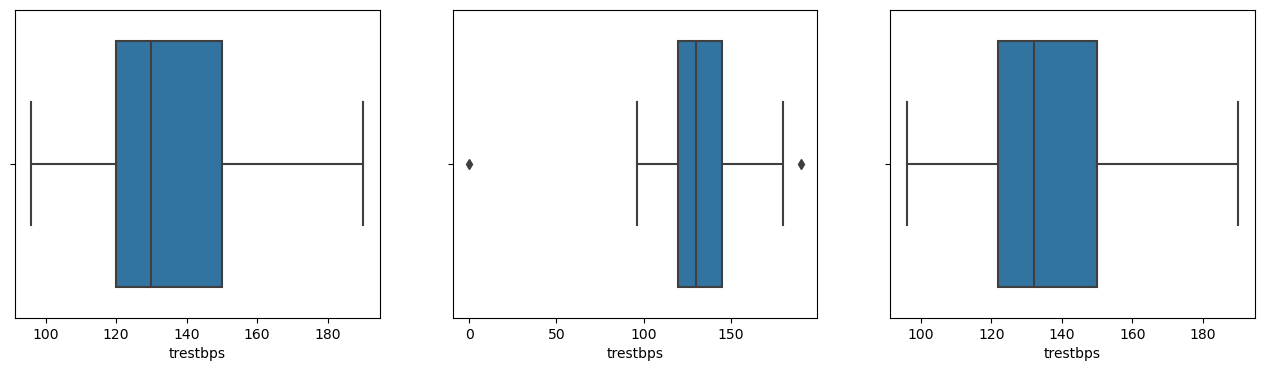

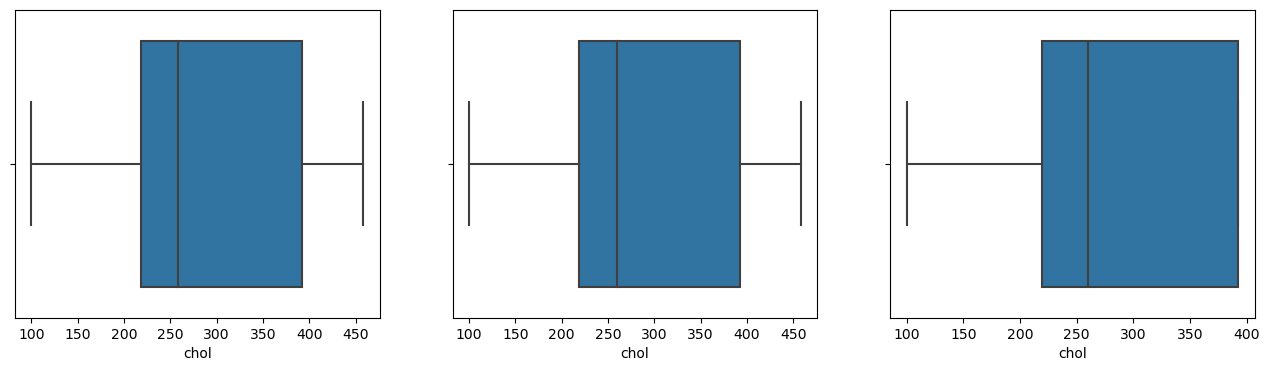

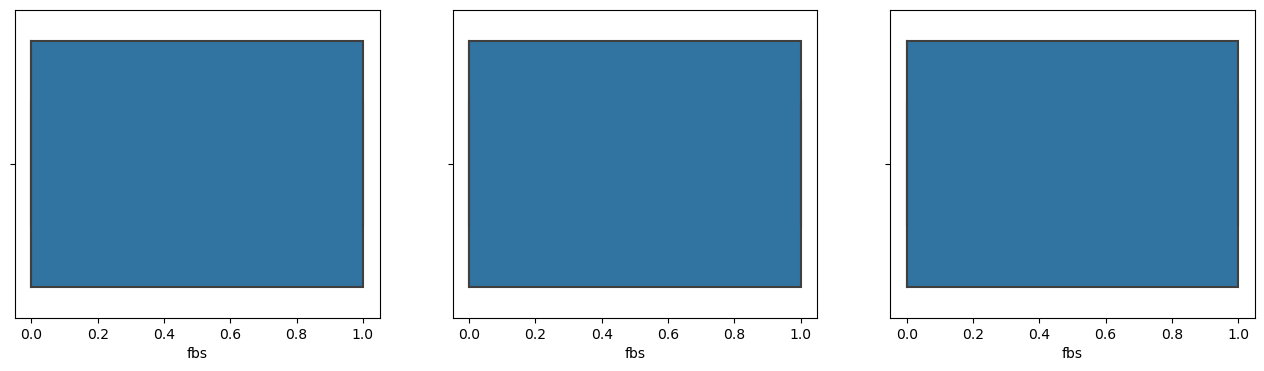

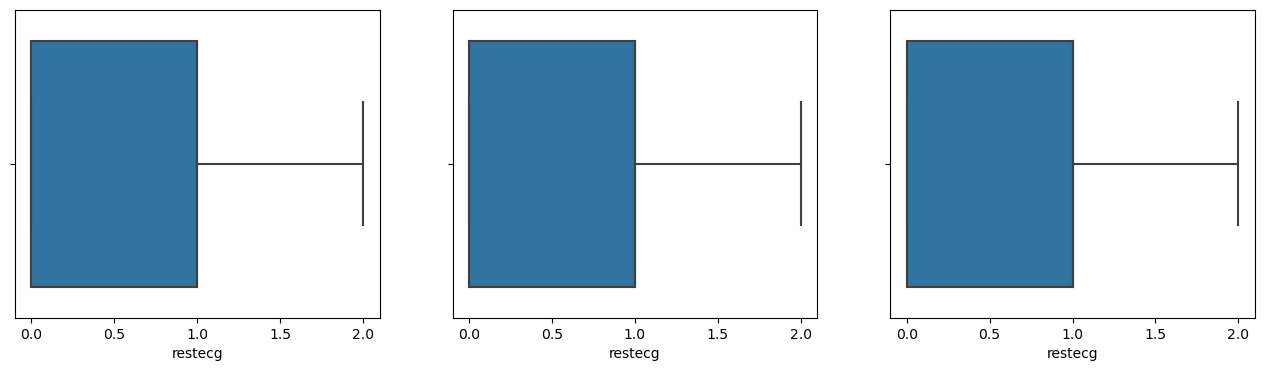

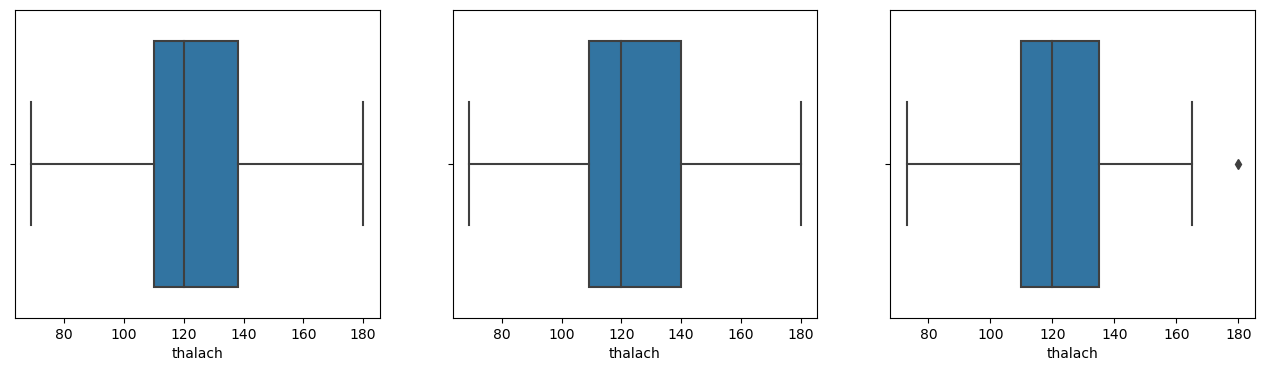

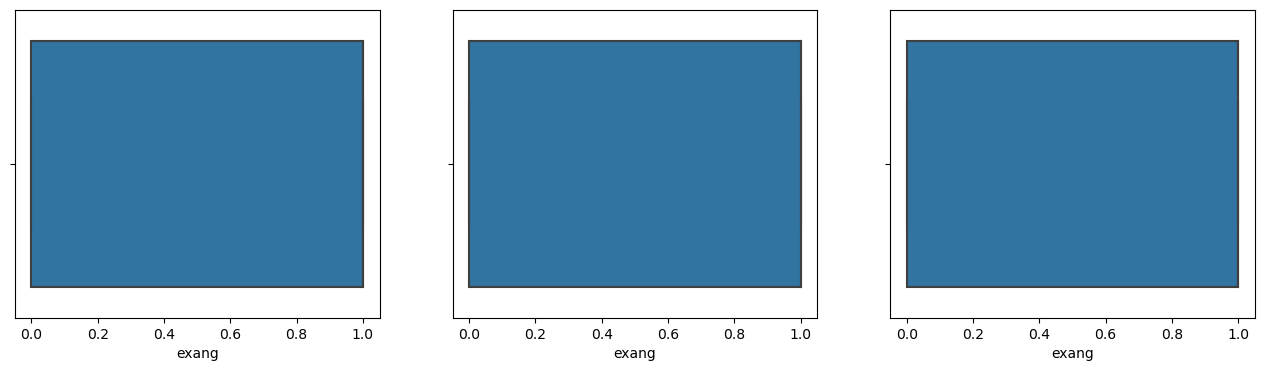

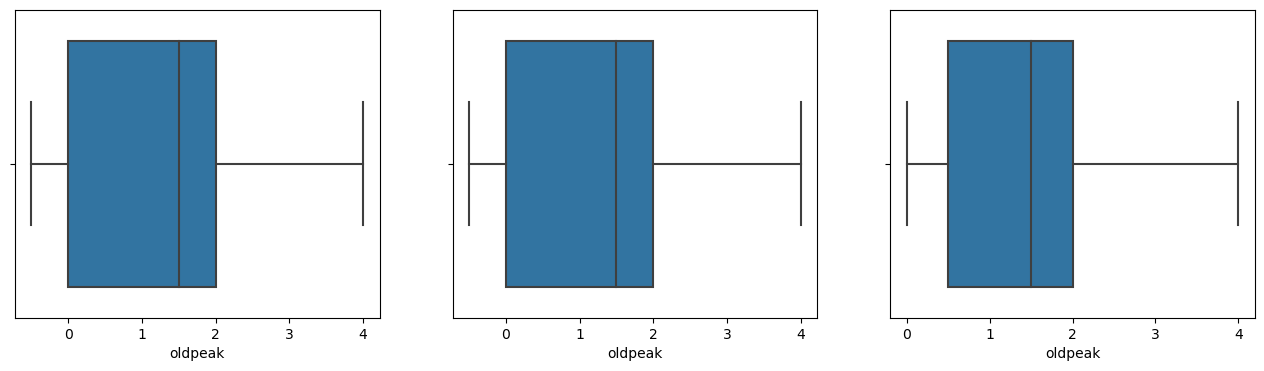

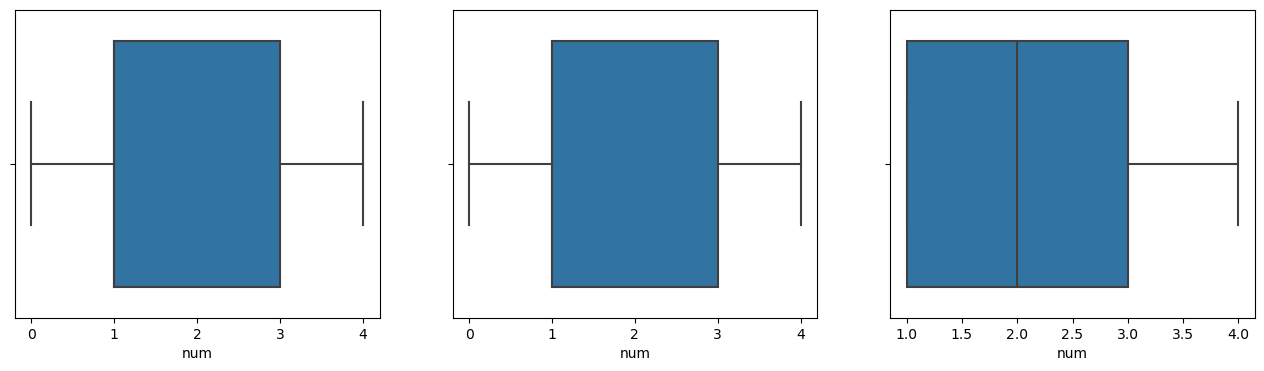

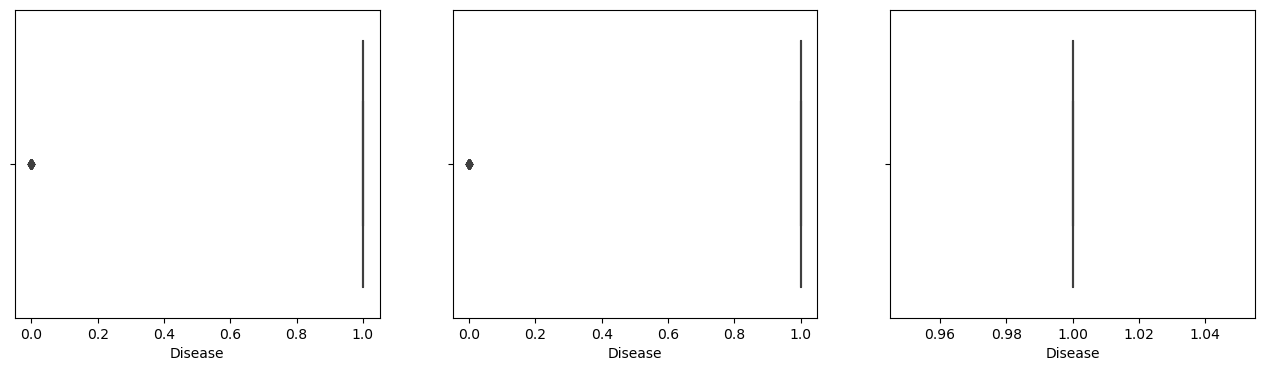

In [516]:
for col in df_cleaned.columns:
    
    fig = fig_this_size(16,4)
    
    fig.add_subplot(131)
    sns.boxplot(df_cleaned_z[col])
    
    fig.add_subplot(132)
    sns.boxplot(df_cleaned[col])
    
    fig.add_subplot(133)
    sns.boxplot(df_cleaned_iqr[col])
    plt.show()

* z-score does a slightly better job at outlier removal
* Let's continue with the z-score 

In [517]:
df_cleaned = df_cleaned_z.copy()                                                          #checkpoint

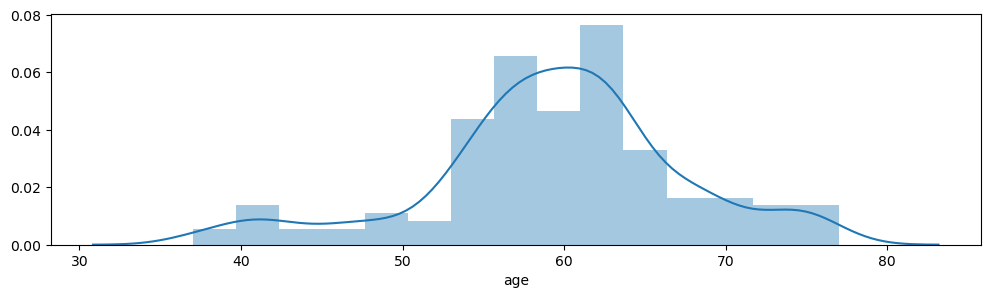

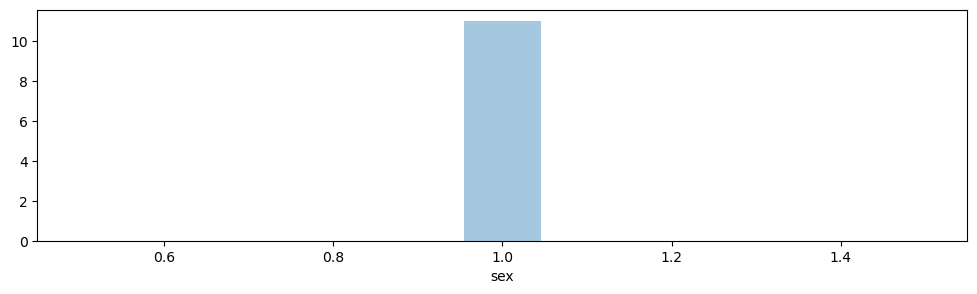

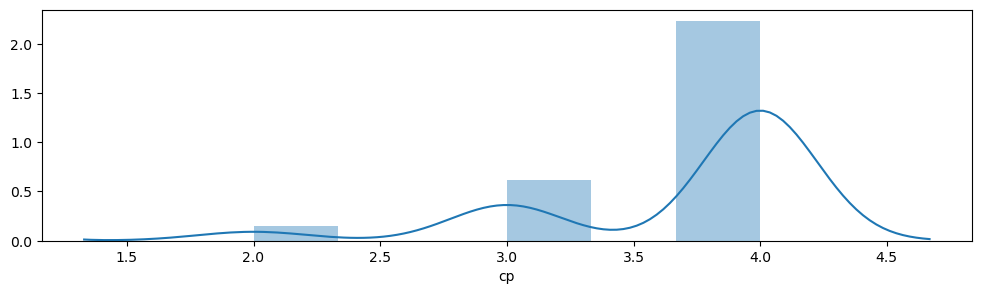

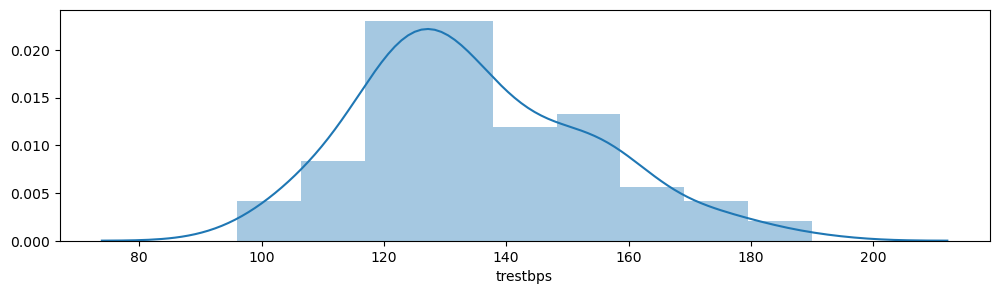

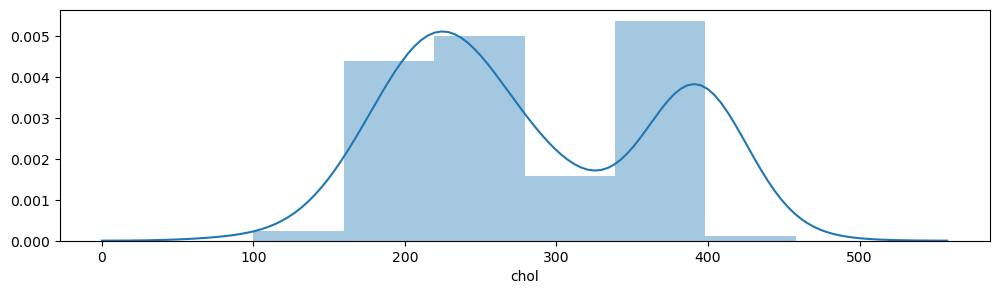

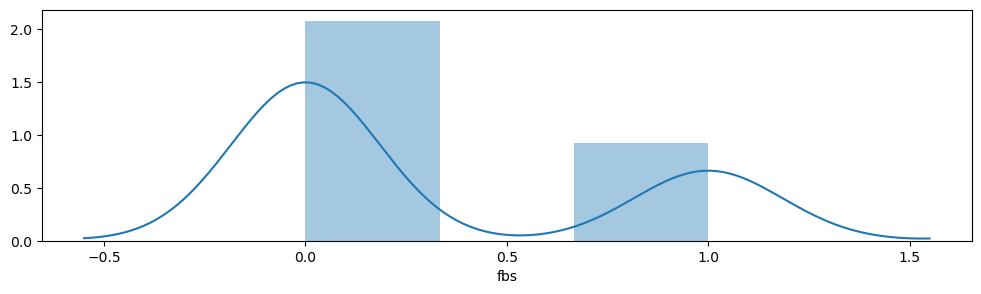

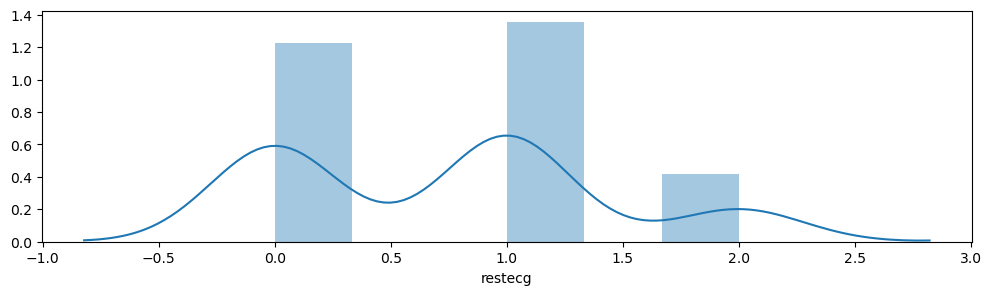

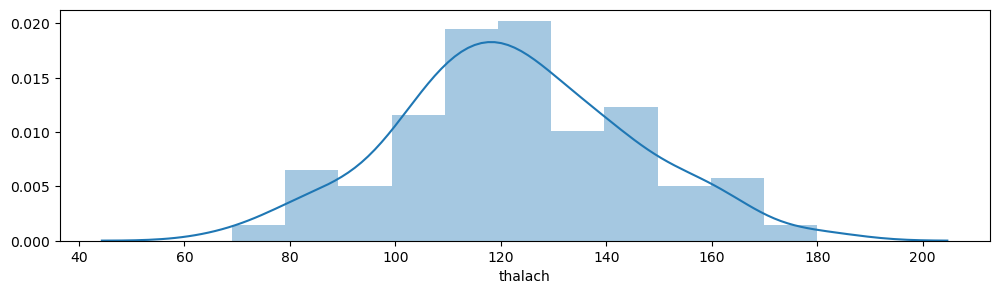

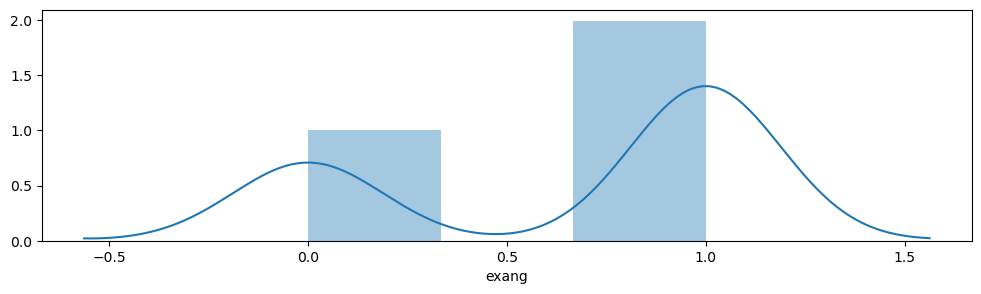

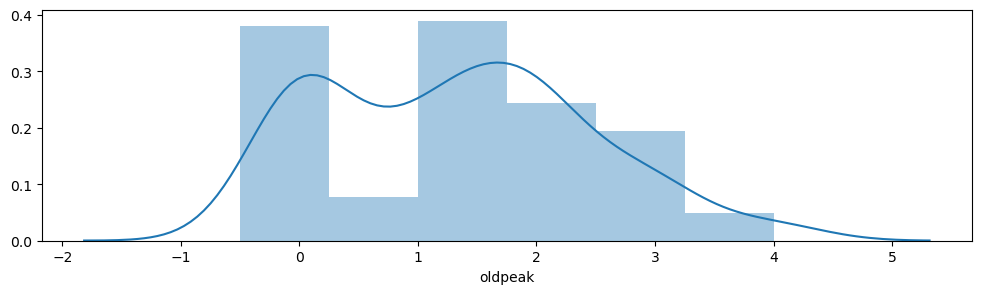

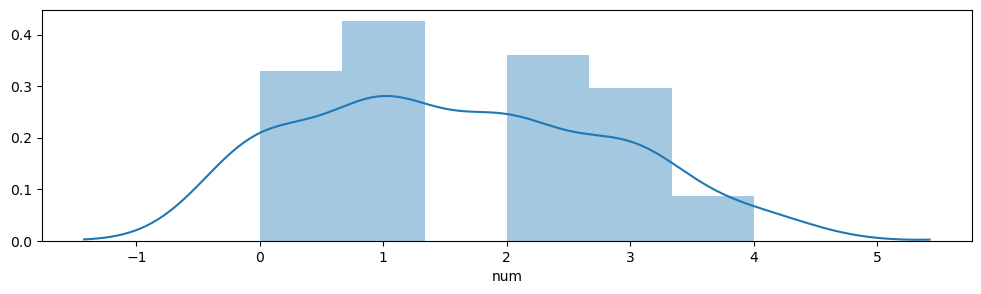

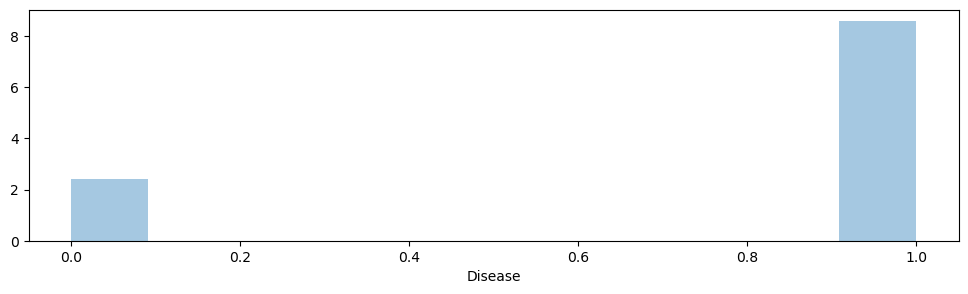

In [518]:
# now let's look into the distribution of the features
for col in df_cleaned.columns:
    
    fig_this_size(12,3)
    sns.distplot(df_cleaned[col])
    plt.show()

* Some of the features are more skewed than others!

In [519]:
# Let's try some transformation to make the features more Gaussian.

In [520]:
df_cleaned.skew()

age        -0.431001
sex         0.000000
cp         -1.687958
trestbps    0.524101
chol        0.262967
fbs         0.848370
restecg     0.414760
thalach     0.156322
exang      -0.703249
oldpeak     0.362749
num         0.263220
Disease    -1.374150
dtype: float64

In [521]:
#try1: log transformation
np.log1p(df_cleaned).skew()

age        -0.955350
sex         0.000000
cp         -1.934072
trestbps    0.192109
chol       -0.143568
fbs         0.848370
restecg    -0.014350
thalach    -0.378377
exang      -0.703249
oldpeak    -0.346753
num        -0.425107
Disease    -1.374150
dtype: float64

* log1p is distorting the data even further..

In [522]:
#try2: log+1 transformation
np.log1p(df_cleaned +1).skew()

age        -0.945900
sex         0.000000
cp         -1.878815
trestbps    0.194577
chol       -0.140916
fbs         0.848370
restecg     0.113704
thalach    -0.373465
exang      -0.703249
oldpeak    -0.131689
num        -0.216451
Disease    -1.374150
dtype: float64

In [523]:
# try3 : arctan transformation
np.arctan(df_cleaned).skew()

age        -1.509277
sex         0.000000
cp         -2.373242
trestbps   -0.153451
chol       -1.089023
fbs         0.848370
restecg    -0.178818
thalach    -0.982806
exang      -0.703249
oldpeak    -0.608232
num        -0.869328
Disease    -1.374150
dtype: float64

In [524]:
# try4 :square root transformation
np.sqrt(df_cleaned).skew()

age        -0.695323
sex         0.000000
cp         -1.846732
trestbps    0.357492
chol        0.094895
fbs         0.848370
restecg    -0.174929
thalach    -0.106837
exang      -0.703249
oldpeak    -0.466141
num        -0.642139
Disease    -1.374150
dtype: float64

In [525]:
# try5 : cube root transformation
np.cbrt(df_cleaned).skew()

age        -0.784794
sex         0.000000
cp         -1.906131
trestbps    0.301717
chol        0.024651
fbs         0.848370
restecg    -0.290225
thalach    -0.197440
exang      -0.703249
oldpeak    -0.772123
num        -0.990604
Disease    -1.374150
dtype: float64

* CP is not a comtinous feature but a categorical feature whose classes are integers from 1 to 4. 
* Thus, the skew transformaation does not make the required impact on the distribution of the same

In [526]:
df_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Disease
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2,1
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,0,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,2,1
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
192,53,1,4,144.0,300.0,1.0,1,128.0,1.0,1.5,3,1
193,62,1,4,158.0,170.0,0.0,1,138.0,1.0,0.0,1,1
194,46,1,4,134.0,310.0,0.0,0,126.0,0.0,0.0,2,1
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,2,1


In [527]:
# let's check the correations between the features in the dataset.
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Disease
age,1.000000,0.034230,-0.038280,0.210980,0.069138,0.127817,0.002400,-0.174125,0.156823,0.183086,0.148603,NaN,0.176430,0.287289,0.189692
sex,0.034230,1.000000,0.038036,0.013820,-0.096204,-0.055372,0.060621,-0.001747,0.018155,0.106811,0.124613,NaN,-0.138675,0.147470,0.098854
cp,-0.038280,0.038036,1.000000,0.097246,0.066279,-0.047701,0.034790,-0.160306,0.235935,0.055933,0.047762,NaN,0.213339,0.168210,0.256614
trestbps,0.210980,0.013820,0.097246,1.000000,0.176922,0.226024,0.106918,-0.013177,0.222550,0.118022,0.109788,NaN,0.230130,0.172577,0.096073
chol,0.069138,-0.096204,0.066279,0.176922,1.000000,0.160850,0.025154,-0.048269,0.102016,0.001549,0.080450,NaN,-0.171315,0.077999,0.019060
fbs,0.127817,-0.055372,-0.047701,0.226024,0.160850,1.000000,0.167657,0.061682,-0.259299,-0.122122,0.023457,NaN,0.059924,0.051012,0.089535
restecg,0.002400,0.060621,0.034790,0.106918,0.025154,0.167657,1.000000,0.014274,-0.093141,-0.123890,-0.027817,NaN,0.110871,-0.032800,-0.059146
thalach,-0.174125,-0.001747,-0.160306,-0.013177,-0.048269,0.061682,0.014274,1.000000,-0.075057,0.179167,-0.164124,NaN,-0.414599,-0.094392,-0.051548
exang,0.156823,0.018155,0.235935,0.222550,0.102016,-0.259299,-0.093141,-0.075057,1.000000,0.314143,0.149392,NaN,0.258353,0.304296,0.299270
oldpeak,0.183086,0.106811,0.055933,0.118022,0.001549,-0.122122,-0.123890,0.179167,0.314143,1.000000,0.331319,NaN,0.209410,0.457514,0.268736


In [528]:
df_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Disease
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2,1
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,0,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,2,1
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
192,53,1,4,144.0,300.0,1.0,1,128.0,1.0,1.5,3,1
193,62,1,4,158.0,170.0,0.0,1,138.0,1.0,0.0,1,1
194,46,1,4,134.0,310.0,0.0,0,126.0,0.0,0.0,2,1
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,2,1


In [529]:
# look at the sex feature after removing the outliers.

In [530]:
df.sex.value_counts()

1    194
0      6
Name: sex, dtype: int64

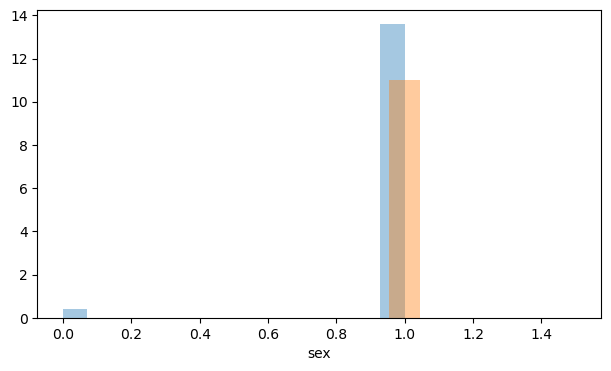

In [531]:
fig = fig_this_size(16,4)

fig.add_subplot(121)
sns.distplot(df.sex)

sns.distplot(df_cleaned.sex)
plt.show()

* When we remove the outliers using z-score, we also removed the only 6 instances which sex as female.
* This thus now makes the feature redundant as it has only males (value : 1) in the complete dataset.
* Thus we also need to drop this feature do.

In [532]:
# drop the sex feature
df_cleaned.drop('sex',1,inplace=True)

In [533]:
# check the correlation of the processed dataset.
df_cleaned.corr()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Disease
age,1.000000,0.066735,0.210893,-0.038413,0.169693,0.087519,-0.180384,0.140897,0.191881,0.343668,0.210240
cp,0.066735,1.000000,0.079803,-0.061845,-0.116370,-0.063140,-0.163424,0.217574,0.143151,0.183501,0.214014
trestbps,0.210893,0.079803,1.000000,-0.101046,0.246770,0.104461,0.073525,0.193213,0.141435,0.246510,0.133596
chol,-0.038413,-0.061845,-0.101046,1.000000,-0.024962,-0.072885,-0.005765,-0.062939,0.005038,0.009461,0.033024
fbs,0.169693,-0.116370,0.246770,-0.024962,1.000000,0.145778,0.076470,-0.231231,-0.106811,-0.011039,0.045825
restecg,0.087519,-0.063140,0.104461,-0.072885,0.145778,1.000000,0.035237,-0.076812,-0.128227,-0.018860,-0.053864
thalach,-0.180384,-0.163424,0.073525,-0.005765,0.076470,0.035237,1.000000,-0.069446,0.186821,-0.111861,-0.090195
exang,0.140897,0.217574,0.193213,-0.062939,-0.231231,-0.076812,-0.069446,1.000000,0.350489,0.365196,0.333637
oldpeak,0.191881,0.143151,0.141435,0.005038,-0.106811,-0.128227,0.186821,0.350489,1.000000,0.438500,0.245807
num,0.343668,0.183501,0.246510,0.009461,-0.011039,-0.018860,-0.111861,0.365196,0.438500,1.000000,0.706034


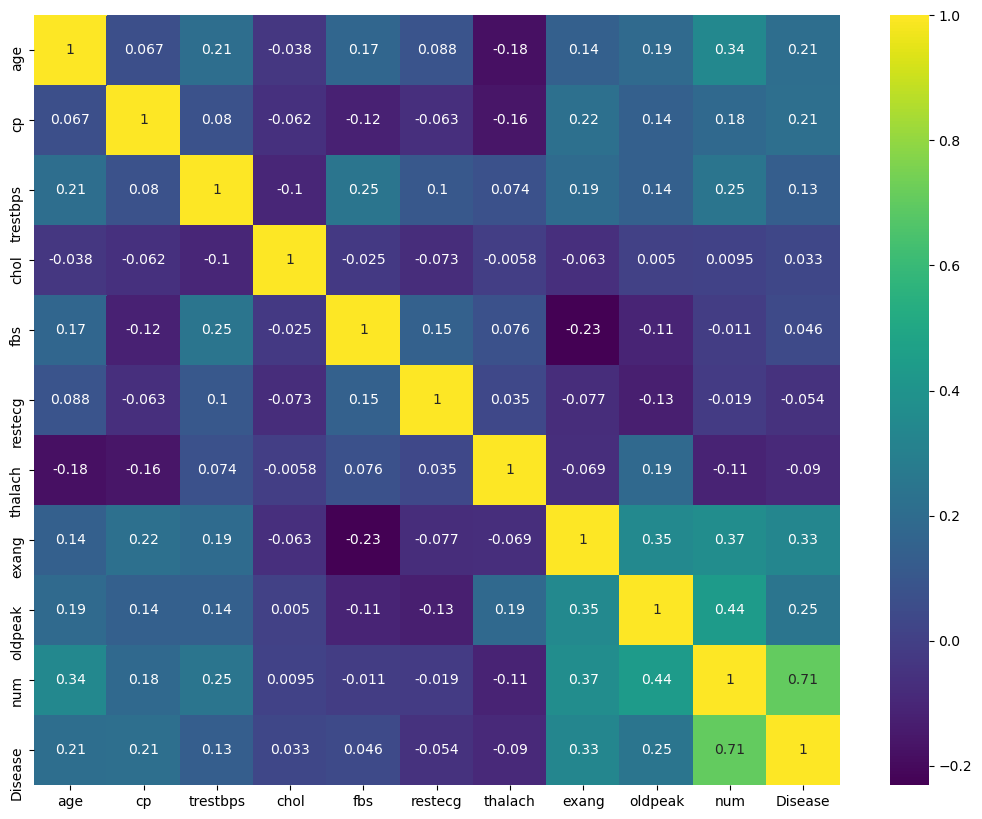

In [534]:
# plot the correlations:
fig_this_size(13,10)
sns.heatmap(df_cleaned.corr(),annot=True,cmap='viridis')

* These inter correlations looks pretty good for the data modelling.

In [553]:
df_cleaned

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Disease
0,63,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2,1
1,44,4,130.0,209.0,0.0,1,127.0,0.0,0.0,0,0
2,60,4,132.0,218.0,0.0,1,140.0,1.0,1.5,2,1
3,55,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1,1
4,66,3,110.0,213.0,1.0,2,99.0,1.0,1.3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
192,53,4,144.0,300.0,1.0,1,128.0,1.0,1.5,3,1
193,62,4,158.0,170.0,0.0,1,138.0,1.0,0.0,1,1
194,46,4,134.0,310.0,0.0,0,126.0,0.0,0.0,2,1
197,55,4,122.0,223.0,1.0,1,100.0,0.0,0.0,2,1


In [554]:
# one hot encoding

* We need to convert the categorical values (even if the are in Interger type) 

In [557]:
df_cleaned.columns

Index(['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'num', 'Disease'],
      dtype='object')

In [558]:
heart_disease_info

,Description,Domain,Data type,Mean,Standard deviation
Feature,,,,,
Age,—,29–77,Real,54,9
Sex,"Male, female","0, 1",Binary,—,—
Chest pain type,"Angina, asymptomatic, abnormal","1, 2, 3, 4",Nominal,—,—
Resting blood pressure,—,94–200,Real,131.344,17.862
Serum cholesterol in mg/dl,—,126–564,Real,249.659,51.686
Fasting blood sugar > 120 mg/dl,—,"0, 1",Binary,—,—
Resting electrocardiographic results,"Norm, abnormal, hyper","0, 1, 2",Nominal,—,—
Maximum heart rate achieved,—,71–202,Real,149.678,23.1666
Exercise-induced angina,—,"0, 1",Binary,—,—


In [566]:
categorical_cols = 'cp restecg '.split()

In [567]:
dataset = pd.get_dummies(df_cleaned,columns = categorical_cols)

In [568]:
dataset

,age,trestbps,chol,fbs,thalach,exang,oldpeak,num,Disease,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2
0,63,140.0,260.0,0.0,112.0,1.0,3.0,2,1,0,0,1,0,1,0
1,44,130.0,209.0,0.0,127.0,0.0,0.0,0,0,0,0,1,0,1,0
2,60,132.0,218.0,0.0,140.0,1.0,1.5,2,1,0,0,1,0,1,0
3,55,142.0,228.0,0.0,149.0,1.0,2.5,1,1,0,0,1,0,1,0
4,66,110.0,213.0,1.0,99.0,1.0,1.3,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,53,144.0,300.0,1.0,128.0,1.0,1.5,3,1,0,0,1,0,1,0
193,62,158.0,170.0,0.0,138.0,1.0,0.0,1,1,0,0,1,0,1,0
194,46,134.0,310.0,0.0,126.0,0.0,0.0,2,1,0,0,1,1,0,0
197,55,122.0,223.0,1.0,100.0,0.0,0.0,2,1,0,0,1,0,1,0


### Goal : 
TO find out, if the heart diease or not 
ie, the num values from (1,2,3,4) predict 'Disease Present'
         and 0 predicts 'No Disease Predict

### Feature Target  split

In [569]:
dataset

,age,trestbps,chol,fbs,thalach,exang,oldpeak,num,Disease,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2
0,63,140.0,260.0,0.0,112.0,1.0,3.0,2,1,0,0,1,0,1,0
1,44,130.0,209.0,0.0,127.0,0.0,0.0,0,0,0,0,1,0,1,0
2,60,132.0,218.0,0.0,140.0,1.0,1.5,2,1,0,0,1,0,1,0
3,55,142.0,228.0,0.0,149.0,1.0,2.5,1,1,0,0,1,0,1,0
4,66,110.0,213.0,1.0,99.0,1.0,1.3,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,53,144.0,300.0,1.0,128.0,1.0,1.5,3,1,0,0,1,0,1,0
193,62,158.0,170.0,0.0,138.0,1.0,0.0,1,1,0,0,1,0,1,0
194,46,134.0,310.0,0.0,126.0,0.0,0.0,2,1,0,0,1,1,0,0
197,55,122.0,223.0,1.0,100.0,0.0,0.0,2,1,0,0,1,0,1,0


In [570]:
X = dataset.drop(['num','Disease'],1)
y= dataset['Disease']

In [571]:
# shape check
X.shape,y.shape

((137, 13), (137,))

In [579]:
### Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22,random_state=42)

In [580]:
# shape check
X_train.shape,y_train.shape,X_test.shape,y_test.shape 

((106, 13), (106,), (31, 13), (31,))

In [581]:
# Standard scaling the features.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model Building

In [582]:
# importing the training dependencies:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [583]:
# importing the evaluation metrics despendencies
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,auc,confusion_matrix,classification_report,plot_confusion_matrix

In [594]:
# helper function
def train_n_ret_scores(model):
    """
    Input: model for fitting the data.
    Output: scores on the test set
    """
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    return model.score(X_test,y_test)

In [595]:
#try1: Logistic Regression
train_n_ret_scores(LogisticRegression())

0.7741935483870968

In [596]:
#try2: SVR
train_n_ret_scores(SVC())

0.7096774193548387

In [597]:
#try3: Decision Tree
train_n_ret_scores(DecisionTreeClassifier())

0.7419354838709677

In [598]:
#try4: Random Forest
train_n_ret_scores(RandomForestClassifier())

0.7741935483870968

In [599]:
#try4: Gradine Boosting
train_n_ret_scores(GradientBoostingClassifier())

0.7419354838709677

In [600]:
# Again in this problem we have imbalance datasets.
# So we should consider the ROC_AUC score as it is robust to some extent on imbalance classes.

In [592]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]
model_names = 'LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,KNeighborsClassifier,SVC,GaussianNB'.split(',')

models_df = pd.DataFrame(columns=['Model','Train_Acc','Test_Acc','Precision','Recall','F1_score','Avg_CV'])

for model,model_names in zip(models,model_names):
    
    model.fit(X_train,y_train)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    y_preds = model.predict(X_test)
    
    prec = precision_score(y_test,y_preds)
    recall = recall_score(y_test,y_preds)
    f1= f1_score(y_test,y_preds)

    avg_cv = np.mean(cross_val_score(model,X,y,cv=KFold(n_splits=10,shuffle=True,random_state=42)))

    models_df = models_df.append({'Model':model_names,'Train_Acc':train_acc,'Test_Acc':test_acc,'Precision':prec,'Recall':recall,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)
    
models_df.set_index('Model',inplace=True)

In [593]:
models_df

,Train_Acc,Test_Acc,Precision,Recall,F1_score,Avg_CV
Model,,,,,,
LogisticRegression,0.849057,0.774194,0.758621,1.000000,0.862745,0.788462
DecisionTreeClassifier,1.000000,0.741935,0.791667,0.863636,0.826087,0.709890
RandomForestClassifier,1.000000,0.806452,0.785714,1.000000,0.880000,0.811538
GradientBoostingClassifier,1.000000,0.741935,0.750000,0.954545,0.840000,0.782418
AdaBoostClassifier,0.952830,0.580645,0.680000,0.772727,0.723404,0.714286
KNeighborsClassifier,0.839623,0.677419,0.700000,0.954545,0.807692,0.781319
SVC,0.886792,0.709677,0.709677,1.000000,0.830189,0.781868
GaussianNB,0.820755,0.709677,0.740741,0.909091,0.816327,0.719780


In [601]:
# random forest is giving us the best results.

In [617]:
# Hyper parameter tuning.
from sklearn.model_selection import RandomizedSearchCV

In [605]:
best_model = RandomForestClassifier()

In [615]:
best_model.fit(X_train,y_train)

RandomForestClassifier()

In [618]:
param_dict = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [621]:
rs_best_model = RandomizedSearchCV(best_model,param_dict,verbose=3)

In [622]:
rs_best_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, score=0.773, total=   2.8s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, score=0.810, total=   2.9s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, score=0.810, total=   2.8s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, score=0.810, total=   2.8s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, score=0.857, total=   2.9s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, score=0.773, total=   2.9s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_

[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, score=0.857, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, score=0.682, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, score=0.667, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, score=0.714, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_dep

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=3)

In [623]:
rs_best_model.best_estimator_

RandomForestClassifier(max_depth=90, min_samples_leaf=2, n_estimators=1000)

In [625]:
rs_best_model.best_score_

0.8121212121212121

In [626]:
cross_val_score(rs_best_model,X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, score=0.727, total=   0.3s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, score=0.818, total=   0.3s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, score=0.727, total=   0.3s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, score=0.773, total=   0.3s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, score=0.857, total=   0.3s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, score=0.773, total=   0.5s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_dep

[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, score=0.857, total=   2.3s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, score=0.727, total=   2.6s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, score=0.818, total=   2.6s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, score=0.727, total=   2.6s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True, score=0.727, total=   1.3s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True, score=0.818, total=   1.3s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True, score=0.727, total=   1.3s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True, score=0.773, total=   1.3s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True, score=0.857, total=   1.3s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False, score=0.818, total=   1.5s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth

[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, score=0.810, total=   2.0s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, score=0.818, total=   2.6s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, score=0.773, total=   2.6s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, score=0.727, total=   2.6s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, score=0.864, total=   2.2s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, score=0.773, total=   2.2s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, score=0.773, total=   2.2s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, score=0.773, total=   2.2s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, score=0.818, total=   2.2s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, score=0.864, total=   3.2s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=False, score=0.773, total=   0.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, score=0.864, total=   2.0s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, score=0.818, total=   2.0s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, score=0.818, total=   1.9s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True, score=0.727, total=   3.3s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True, score=0.727, total=   2.9s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.1s remaining:    0.0s


[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True, score=0.773, total=   2.9s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True, score=0.773, total=   2.9s
[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True, score=0.818, total=   2.9s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=True, score=0.727, total=   2.2s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, m

[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, score=0.864, total=   2.5s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, score=0.727, total=   1.6s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, score=0.727, total=   1.6s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, score=0.818, total=   1.5s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_featur

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True, score=0.773, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True, score=0.818, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True, score=0.773, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True, score=0.727, total=   0.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True, score=0.773, total=   0.3s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=True, score=0.864, total=   1.3s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=2

[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, score=0.818, total=   2.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, score=0.773, total=   1.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, score=0.773, total=   1.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, score=0.773, total=   1.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


array([0.82142857, 0.78571429, 0.74074074, 0.74074074, 0.85185185])

In [ ]:
# saving the best model
import joblib
joblib.dump(rs_best_model,'Heart_Disease.pkl')